# **MIRACLE7 E-Commerce Shipping Data Exploratory Data Analysis (EDA)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pal = sns.color_palette()

from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://raw.githubusercontent.com/salsmardhiyah/EcommerceShippingData/main/E-Commerce%20Shipping%20Data-Train.csv'
df = pd.read_csv(url)

# **1. Explanatory Data Analysis (EDA)**

## **1.1 Descriptive Statistics**

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 

In [ ]:
df.info() # taking a look at info of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.describe() # getting description of data

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

In [ ]:
# pengelompokan kolom untuk variabel kategorik
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df[cats].describe()

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

In [ ]:
# Ratio of delayed (1) and not delayed orders (0)
df['Reached.on.Time_Y.N'].value_counts() / df['Reached.on.Time_Y.N'].count()

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
# Percentage of delayed (1) and not delayed orders (0)
df['Reached.on.Time_Y.N'].value_counts() / df['Reached.on.Time_Y.N'].count() *100

1    59.669061
0    40.330939
Name: Reached.on.Time_Y.N, dtype: float64

In [30]:
df = df.drop('ID', axis=1)

In [ ]:
# Print some information about the data
print("Missing values:", df.isna().sum().sum())
print("Categorical features:", len(df.select_dtypes('object').columns))
print("Numerical features:", len(df.select_dtypes('number').columns))

Missing values: 0
Categorical features: 4
Numerical features: 7


Jawaban:

A. Kolom Reached.on.Time_Y.N seharusnya data type nya adalah object (boolean) karena variabel tersebut merupakan data kategorik yang mengartikan nilai 1 adalah no dan nilai 0 adalah yes.

B. Tidak ada kolom yang memiliki nilai kosong, dapat dilihat dari output di atas bahwa seluruh kolom memiliki jumlah baris yang sama dengan jumlah data yaitu 10.999 baris/data.

C. Kolom yang memiliki summary aneh: 
1. Kolom Weight in gms memiliki selisih nilai mean dan median yang cukup jauh yaitu sebesar 515 yang mengartikan bahwa variabel tersebut memiliki outlier/pencilan.
2. Kolom Mode_of_Shipment memiliki distribusi yang terlalu timpang karena nilai kategori Ship mendominasi, hal tersebut menyebabkan feature tidak akan terlalu berguna dalam klasifikasi 

## **1.2. Univariate Analysis**

### **Bar Plots based on Features (Categorical Data)**

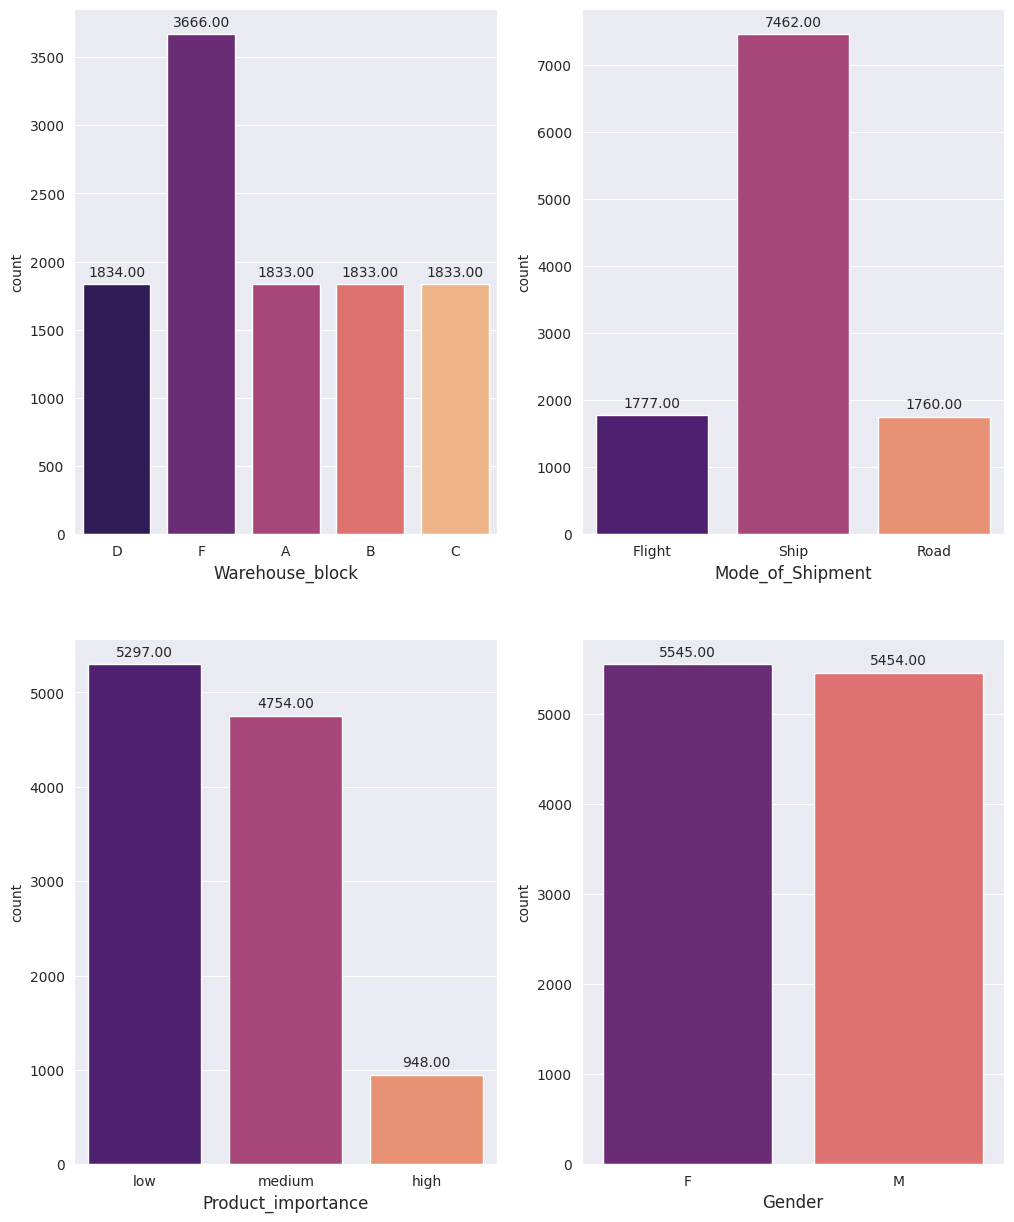

In [ ]:
dfcategory = df.select_dtypes(include = 'object')
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(12, 15)) 
for value, subplot in zip(dfcategory.columns,ax.flatten()):
    plotting = sns.countplot(x = dfcategory[value], ax=subplot, palette='magma')
    plotting.set_xlabel(value, fontsize = 12)
    plotting.set_xticklabels(plotting.get_xticklabels())
    
    for p in plotting.patches:
        plotting.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')

plt.show()

- Warehouse Block: Persebaran pesanan pada blok A, B, C, D cukup merata sementara blok F memiliki jumlah pesanan yang jauh lebih besar yg bisa mencapai kurang lebih 2x lipat pesana di blok yang lain.

- Mode of Shipment : Mode pengirimin mengggunakan tarnsaportasi udara dan darat memiliki jumlah yang serupa sementara moda pengiriminan menggunakan transporatsi laut memiliki jumlah yang jauh lebih besar yaitu mencapai 4 x lipat dari moda pengiriman lainnya.

- Product Importance: low imporatnce dan medium importance menjadi data yg mayoritas sedangkan high importance menjadi data yg minoritas

- Gender: Kedua kelas seimbang.


### **Bar Plot based on Features (Categorical Data) viewed by Reached on time or not (Target Variable)**

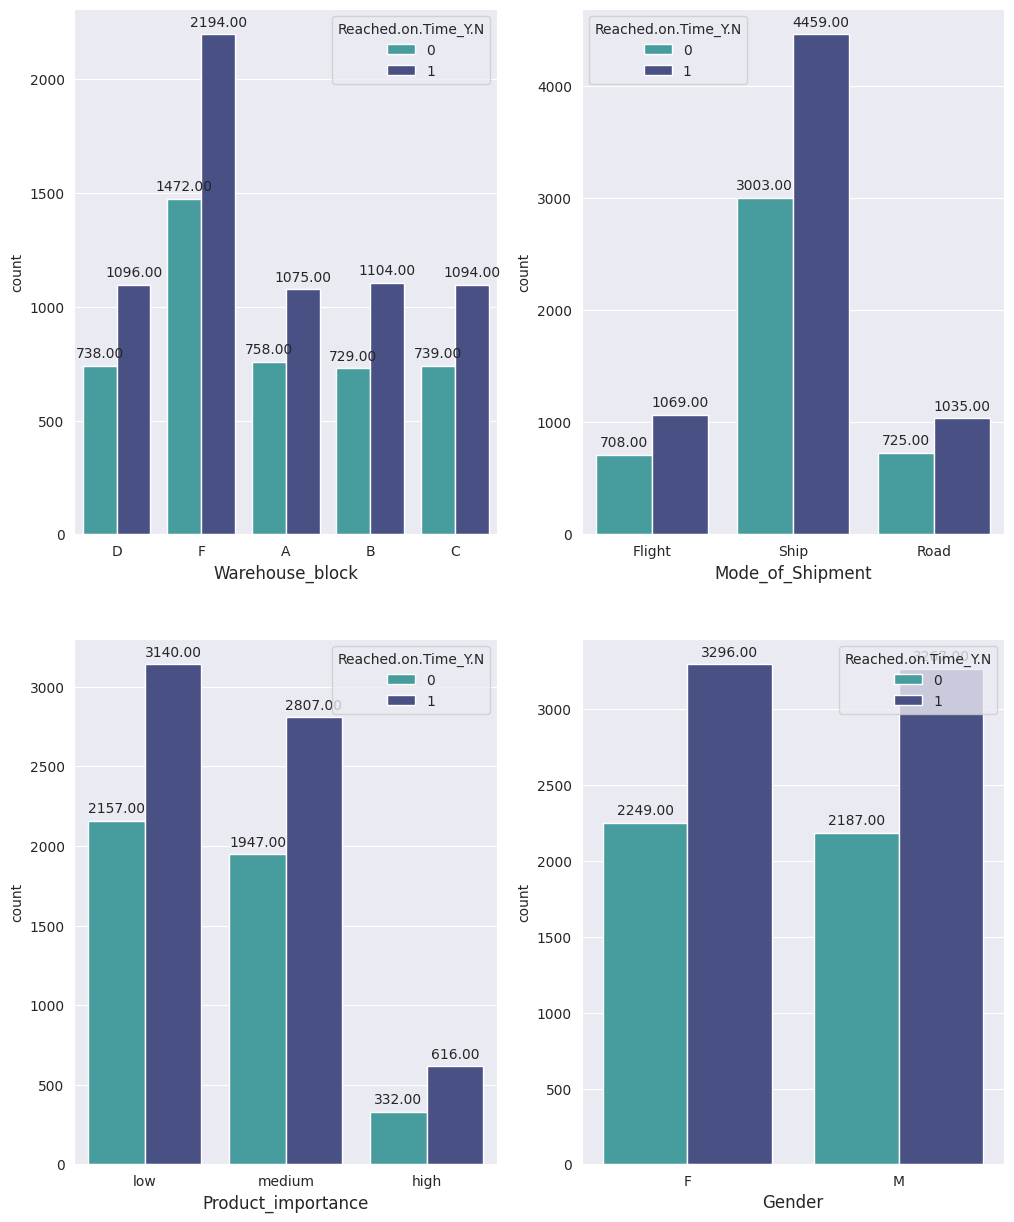

In [ ]:
dfcategory = df.select_dtypes(include = 'object')
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(12, 15)) 
for value, subplot in zip(dfcategory.columns,ax.flatten()):
    plotting = sns.countplot(x = dfcategory[value],ax=subplot,palette='mako_r', hue = df['Reached.on.Time_Y.N'] )
    plotting.set_xlabel(value, fontsize = 12)
    plotting.set_xticklabels(plotting.get_xticklabels())
    
    for p in plotting.patches:
        plotting.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')

plt.show()

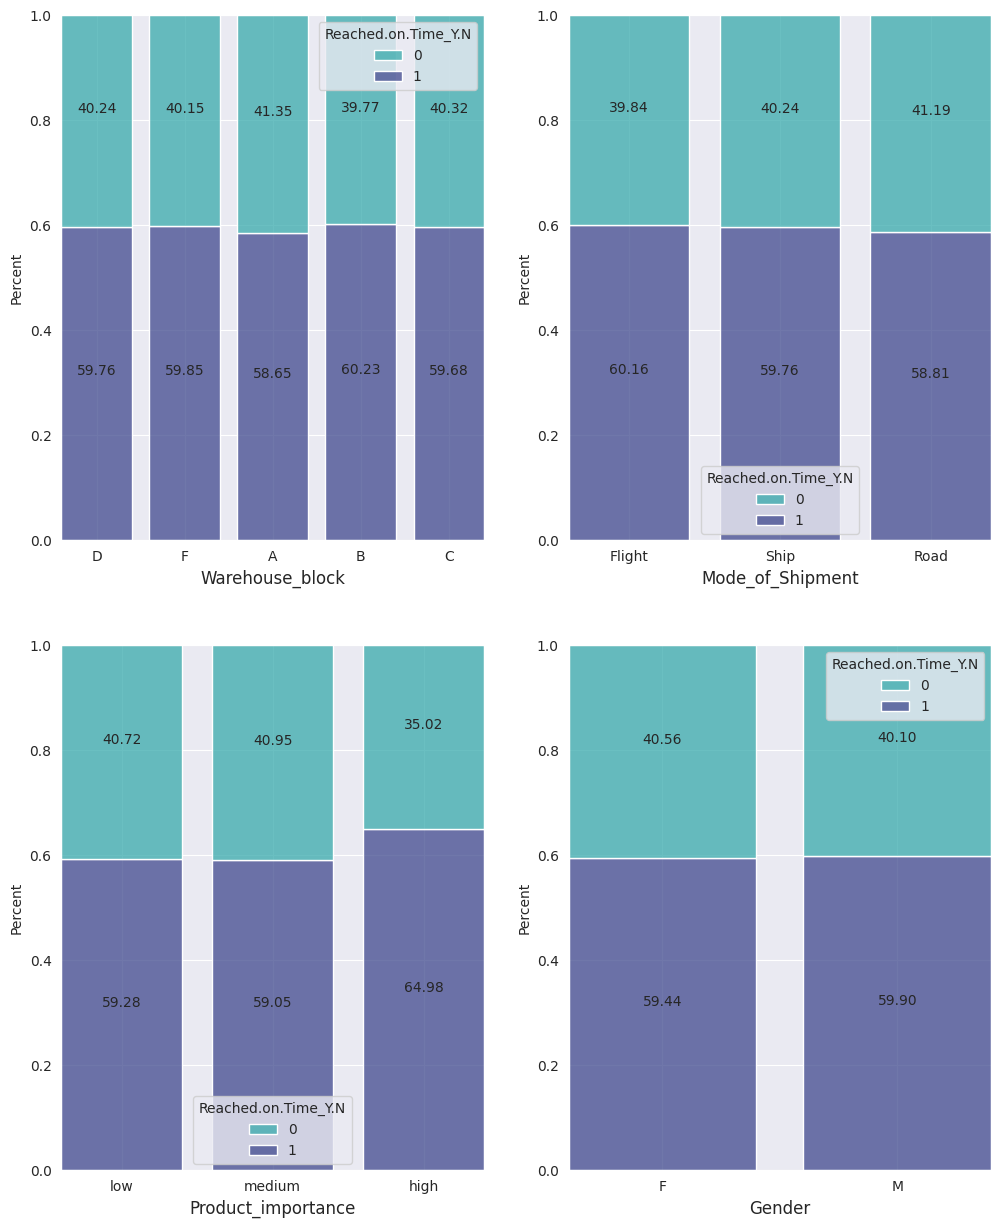

In [ ]:
dfcategory = df.select_dtypes(include = 'object')
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(12, 15)) 
for value, subplot in zip(dfcategory.columns,ax.flatten()):
    plotting = sns.histplot(x = dfcategory[value],ax=subplot,palette='mako_r', hue = df['Reached.on.Time_Y.N'],multiple="fill", stat="percent",
    discrete=True, shrink=.8 )
    plotting.set_xlabel(value, fontsize = 12)
    plotting.set_xticklabels(plotting.get_xticklabels())
    
    for p in plotting.patches:
        plotting.annotate(format(p.get_height()*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()/2), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')

plt.show()

- Sekitar 68% keterlambatan pengiriman disebabkan karena kapal digunakan sebagai moda pengiriman. Jadi, opsi alternatif seperti layanan Penerbangan dan Jalan dapat dipertimbangkan untuk mengurangi keterlambatan pengiriman

- Persentase pengiriman tertunda yang lebih tinggi dicatat di Gudang blok F sebesar 33%.

- Pemberian rating oleh pelanggan miliki sebaran data yang mirip. Hampir 20% dari total pengiriman menerima rating 5

### **Distribution of Features (Numerical Data)**

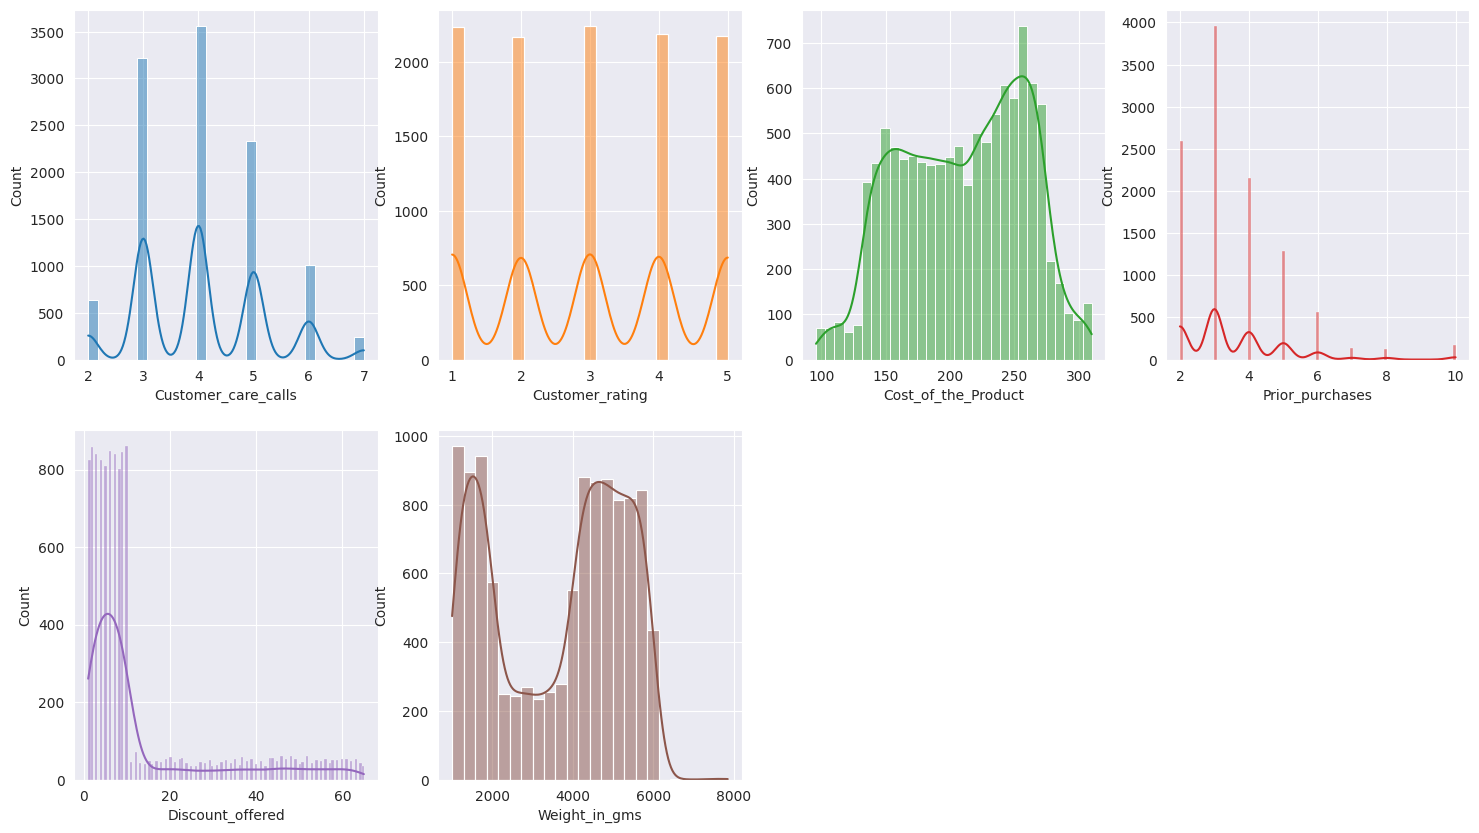

In [ ]:
# Display value distributions
plt.figure(figsize=(18, 10))

num_features = df.select_dtypes('number').drop('Reached.on.Time_Y.N', axis=1).columns.values

for i, num in enumerate(num_features):

    plt.subplot(2, 4, i+1)
    sns.histplot(df[num], color=pal[i], kde=True)
    
plt.show()

- Customer Care Calls: Distribusi positively skewed dengan modus 4.

- Customer Rating:uniform distribution.

- Cost of the product:

- Prior purchases: Positively skewed dengan modus 3.

- Discount Offered: Dipisahkan menjadi 2 uniform distribution: 0 hingga 10 merupakan nilai mayoritas dan kemudian nilai minoritas lebih besar dari 10 hingga 65.

- Weight in gms: terbagi jadi 3 zona: tinggi dari 1000 hingga 2000 dan dari 4000 hingga 6000. Rendah dari 2000 hingga 4000.

### **BOX PLOT**

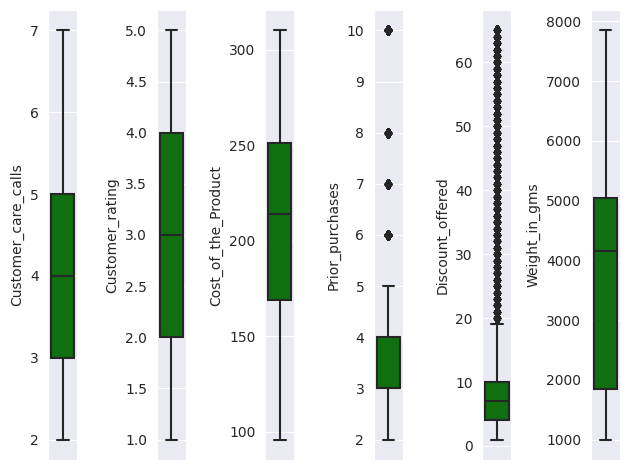

In [ ]:
for i in range(0, len(num_features)):
    plt.subplot(1, len(num_features), i+1)
    sns.boxplot(y=df[num_features[i]], color='green', orient='v')
    plt.tight_layout()

**Preprocessing Recommendation**
- Handling Missing Data
  - Tidak ada missing value pada dataset ini

- Handling Duplicated Data
  - Tidak terdapat duplicated data pada dataset ini

- Handling Outliers
  - Feature `Discount_Offered` dan `Prior_purchase` memiliki data outlier di sebelah kanan. Rekomendasi penanganan outlier untuk fitur ini berdasarkan z score karena fitur memiliki data outlier yang banyak sehingga jika menggunakan nilai IQR akan menghapus baris data terlalu banyak.

- Feature Transformation
  - Diketahui Feature Cost_of_product` dan `Weight_in_gms` memiliki distribusi tidak normal dan bukan right skewed, sehingga direkomendasikan menggunakan transformasi standardization dapat merubah sebaran data mendekati distribusi normal
  - Diketahui Feature `Discount_offered` dan `Prior_purchase` memiliki distribusi right skewed sehingga dengan menggunakan log transformation diharapkan dapat merubah bentuk sebaran data mendekati normal

- Feature Encoding
  - Feature `Gender` dan `Product_importance` direkomendasikan untuk dilakukan encoding menggunakan Label Encoding. Hal ini didasari karakteristik Feature `Gender` yang memiliki jumlah distinct values (F & M), sedangkan Feature `Product_importance` memiliki tipe values ordinal (low, medium, high)
  - Feature `Warehouse_block` dan `Mode_of_shipment` direkomendasikan untuk dilakukan encoding menggunakan One Hot Encoding. Hal ini didasari karakteristik Feature `Warehouse_block` dan `Mode_of_shipment` memiliki distinct values lebih dari dua namun tidak berjenis ordinal

- Class Imbalance
  - Distribusi nilai unik pada fitur target `Reached.on.Time_Y.N` yaitu sebanyak 60% data '1' dan 40% data '0' sehingga masuk pada Imbalance Data dengan kategori Mild (20-40%). Untuk mengatasi class imbalance pada dataset ini direkomendasikan menggunakan algoritma oversampling SMOTE sehingga data sintetis dapat dibuat di antara kelas minoritas menggunakan interpolasi antar titik-titik data.

## **1.3. Multivariate Analysis**

### **CORRELATION**

In [ ]:
num_features = df.select_dtypes('number')
num_features.corr(method = 'kendall')

Customer_care_calls  Customer_rating  \
Customer_care_calls             1.000000         0.009632   
Customer_rating                 0.009632         1.000000   
Cost_of_the_Product             0.224405         0.007486   
Prior_purchases                 0.217438         0.008550   
Discount_offered               -0.079353        -0.001728   
Weight_in_gms                  -0.172928        -0.003562   
Reached.on.Time_Y.N            -0.058363         0.011724   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
Customer_care_calls             0.224405         0.217438         -0.079353   
Customer_rating                 0.007486         0.008550         -0.001728   
Cost_of_the_Product             1.000000         0.140056         -0.079716   
Prior_purchases                 0.140056         1.000000         -0.071276   
Discount_offered               -0.079716        -0.071276          1.000000   
Weight_in_gms                  -0.094513        -0.172384         -0.216055   
Reached.on.Time_Y.N            -0.058845        -0.067473          0.281408   

                     Weight_in_gms  Reached.on.Time_Y.N  
Customer_care_calls      -0.172928            -0.058363  
Customer_rating          -0.003562             0.011724  
Cost_of_the_Product      -0.094513            -0.058845  
Prior_purchases          -0.172384            -0.067473  
Discount_offered         -0.216055             0.281408  
Weight_in_gms             1.000000            -0.217190  
Reached.on.Time_Y.N      -0.217190             1.000000

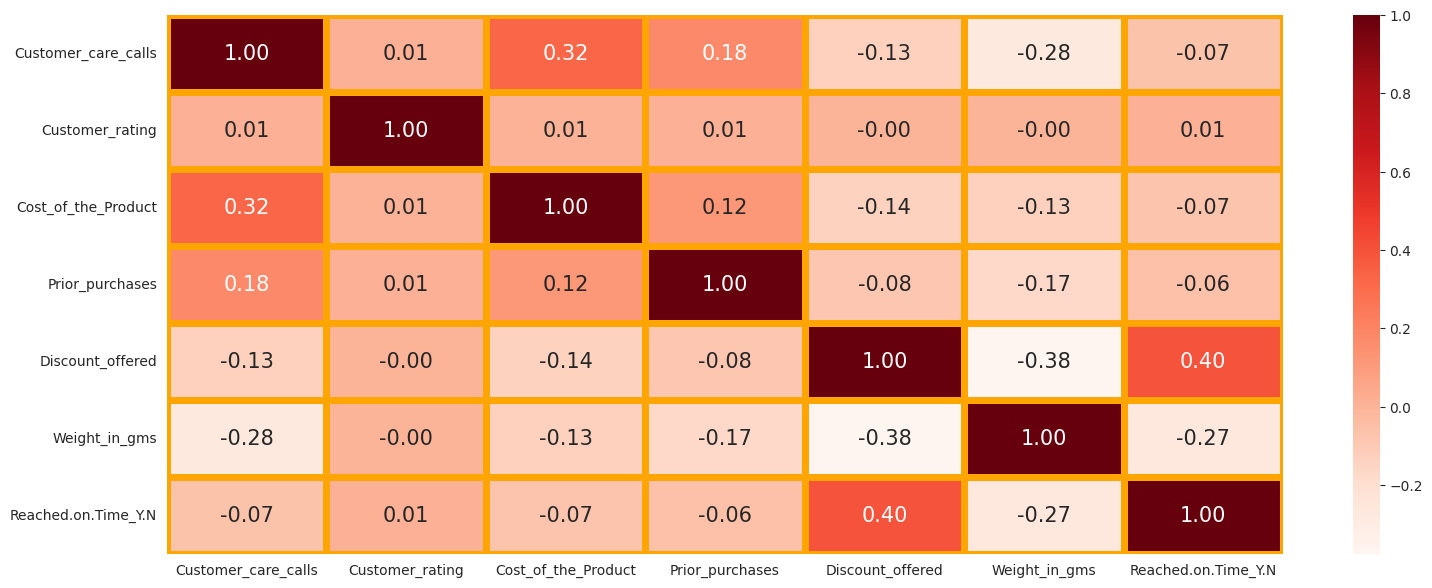

In [ ]:
# heatmap of the data for checking the correlation between the features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(num_features.corr(method='pearson'), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange', cmap = 'Reds')
plt.show()

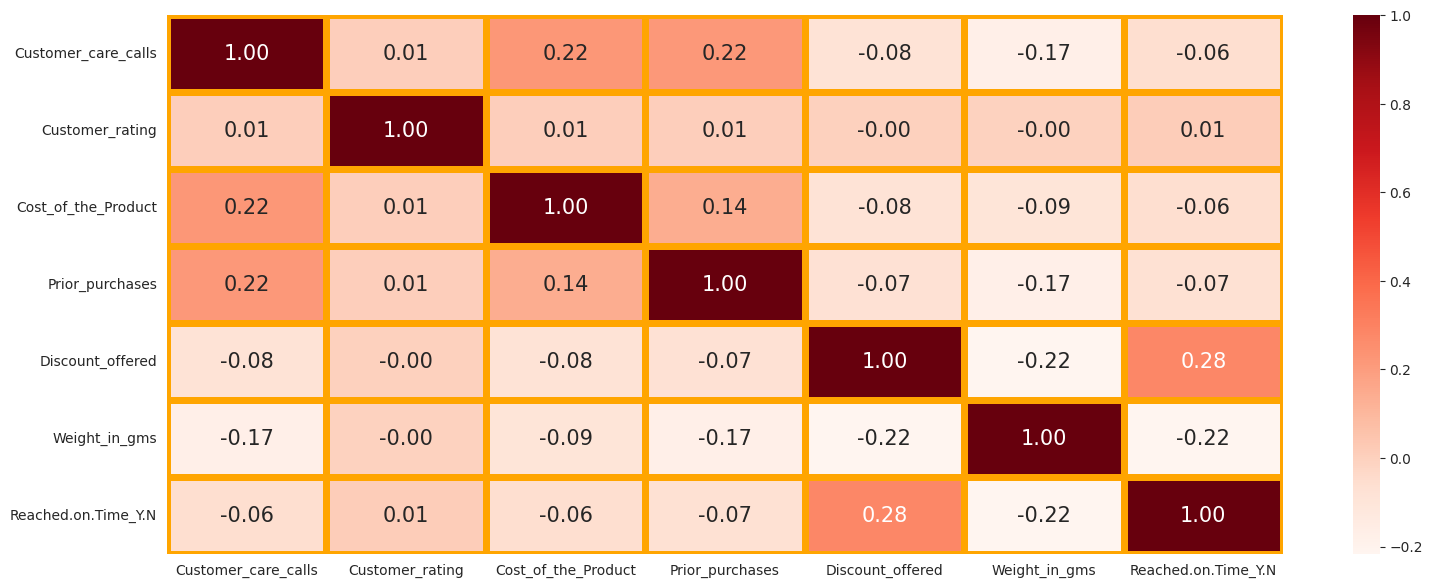

In [ ]:
# heatmap of the data for checking the correlation between the features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(num_features.corr(method='kendall'), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange', cmap = 'Reds')
plt.show()

- Insight yang menarik dapat dilihat bahwa discount dan ketepatan waktu sampainya barang saling berkorelasi, dimana semakin besar discount yang ditawarkan semakin tinggi kemungkinan barang samapi tidak tepat waktu.

- Biaya produk dan panggilan layanan pelanggan saling berkorelasi, dimana jika pelanggan kita membayar lebih banyak uang untuk produk, mereka cenderung memiliki lebih banyak melakukan customer care calls.

**Conlusion:**
1. Berdasarkan hasil korelasi di atas dapat disimpulkan bahwa variabel Weight in Grams dan Discount Offered dapat paling relevan dan dapat dipertahankan karena memiliki nilai korelasi > 0.2 sedangkan variabel lainnya memiliki korelasi yang sangat lemah dengan r < 0.1 sehingga variabel lainnya dapat didrop.
2. Korelasi antar feature tidak ada 2 feature yang berkorelasi kuat atau > 0.7 sehingga tidak ada feature yang redundan yang mengartikan bahwa data tidak memiliki masalah multikolinearitas.

### **PAIR PLOT**


<Figure size 1500x1500 with 0 Axes>

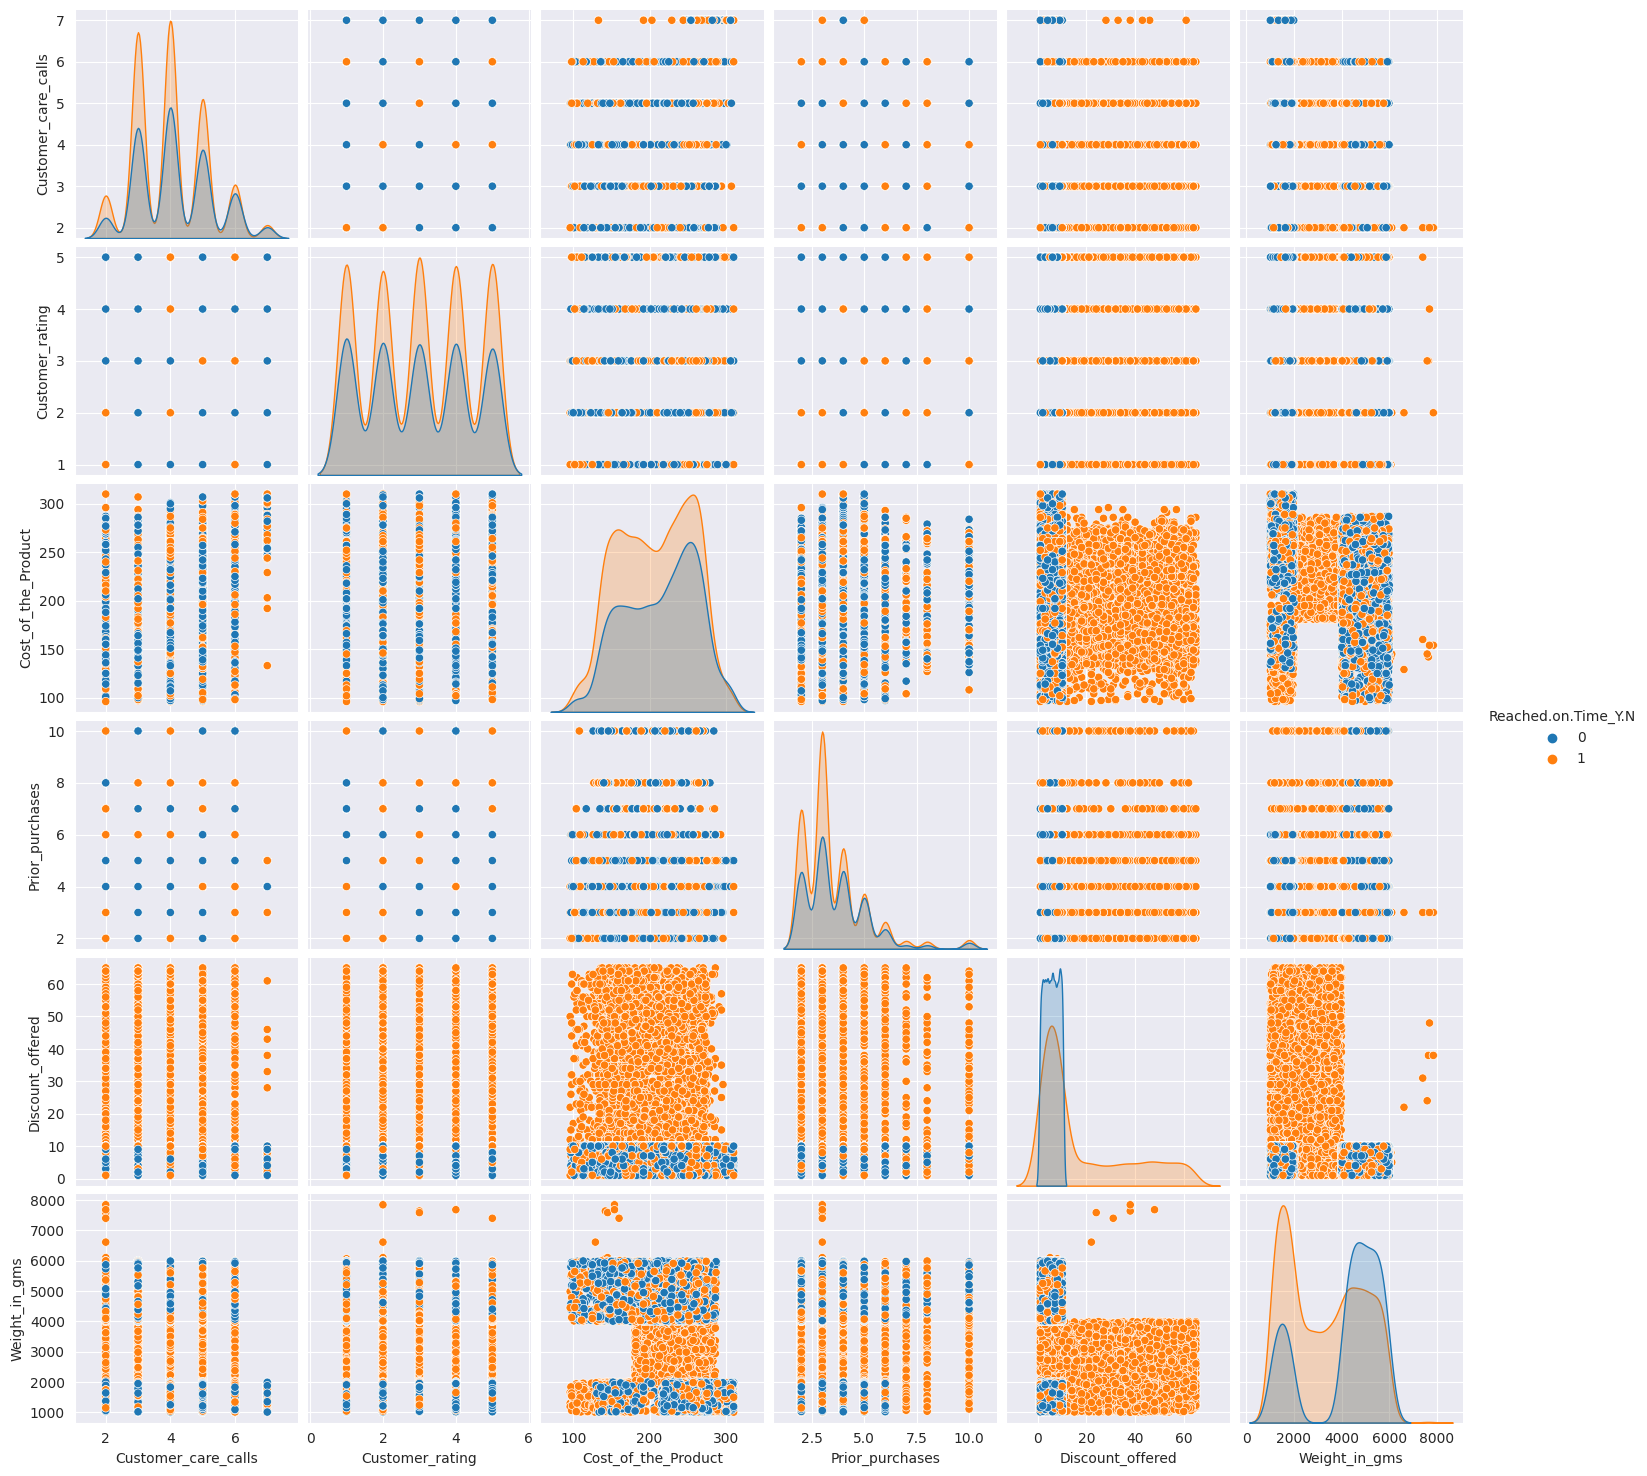

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='Reached.on.Time_Y.N')

**Conclusion:**

- Berdasarkan Pair Plot di atas dapat dilihat bahwa pada scatter plot variabel discount_offered terlihat pattern yang sangat jelas terpisah antara yang tepat waktu dan tidak tepat waktu. Pada discount >10% seluruhnya tidak tepat waktu. Sehingga Discount offered dapat menjadi concern dalam perbaikan variabel Reached on Time. 

- Berdasarkan Pair Plot di atas dapat dilihat bahwa pada scatter plot variabel Weight in Grams terlihat pattern yang sangat jelas terpisah antara yang tepat waktu dan tidak tepat waktu. Pada Weight rentang 2000 - 4000 gram di hampir seluruh pesanan datang tidak tepat waktu. Sehingga Weight in Grams dapat menjadi concern dalam perbaikan variabel Reached on Time.


**Preprocessing Recommendation**
- Feature Selection
  - Feature `ID` akan didrop karena memiliki kardinalitas yang tinggi. 
  - Berdasarkan uji Chi Square, Feature `Product_importance` memiliki pengaruh terhadap variabel target 
  - Berdasarkan uji korelasi  Kendall Tau, Feature `Weight_in_gms` dan `Discount_offer` memiliki korelasi dengan variable target 
  - Feature selain `Product_importance`, `Weight_in_gms` dan `Discount_offer` direkomendasikan untuk didrop karena tidak memiliki pengaruh terhadap variabel target

### **STRIP PLOTS**

In [ ]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes('number').drop(['Reached.on.Time_Y.N'], axis=1).columns.values

#### All Features (Numerical Data) to Warehouse_block Variable

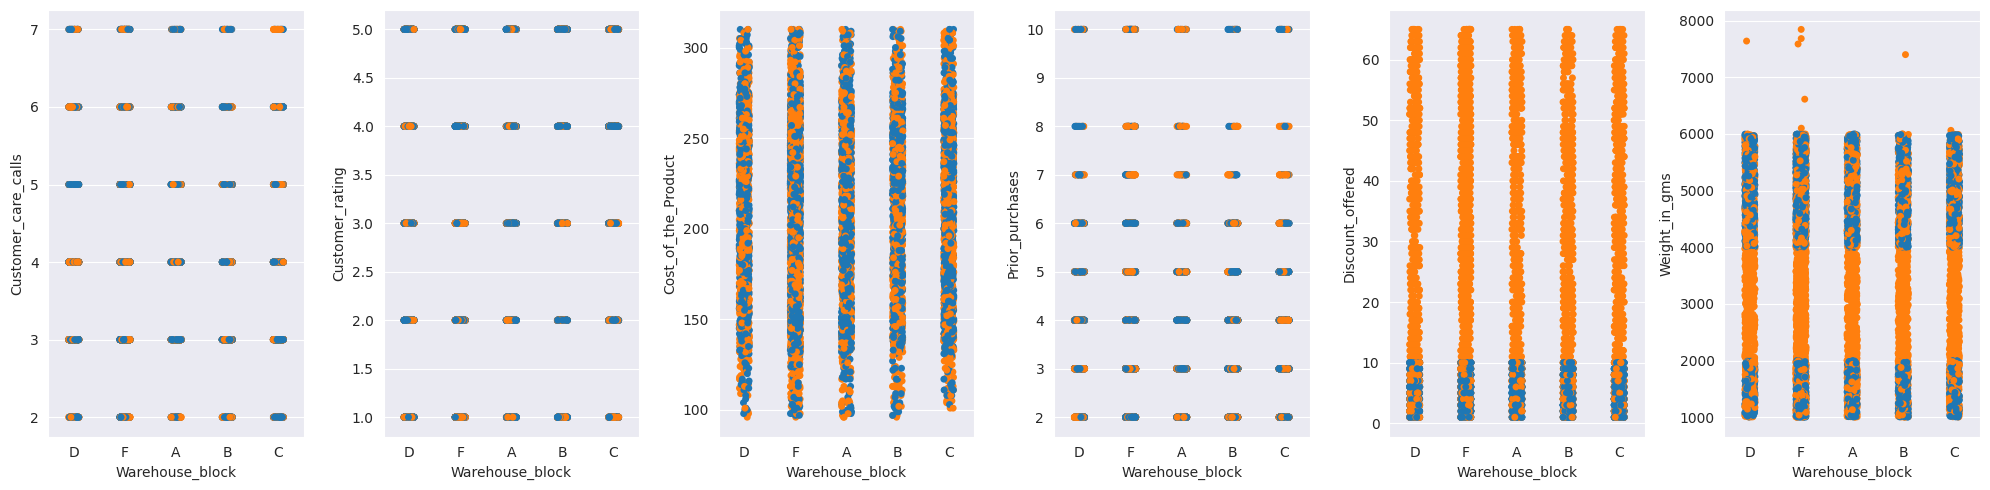

In [ ]:
# create strip plot for each categorical feature ['Warehouse_block']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[0], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

#### All Features (Numerical Data) to Mode_of_Shipment Variable

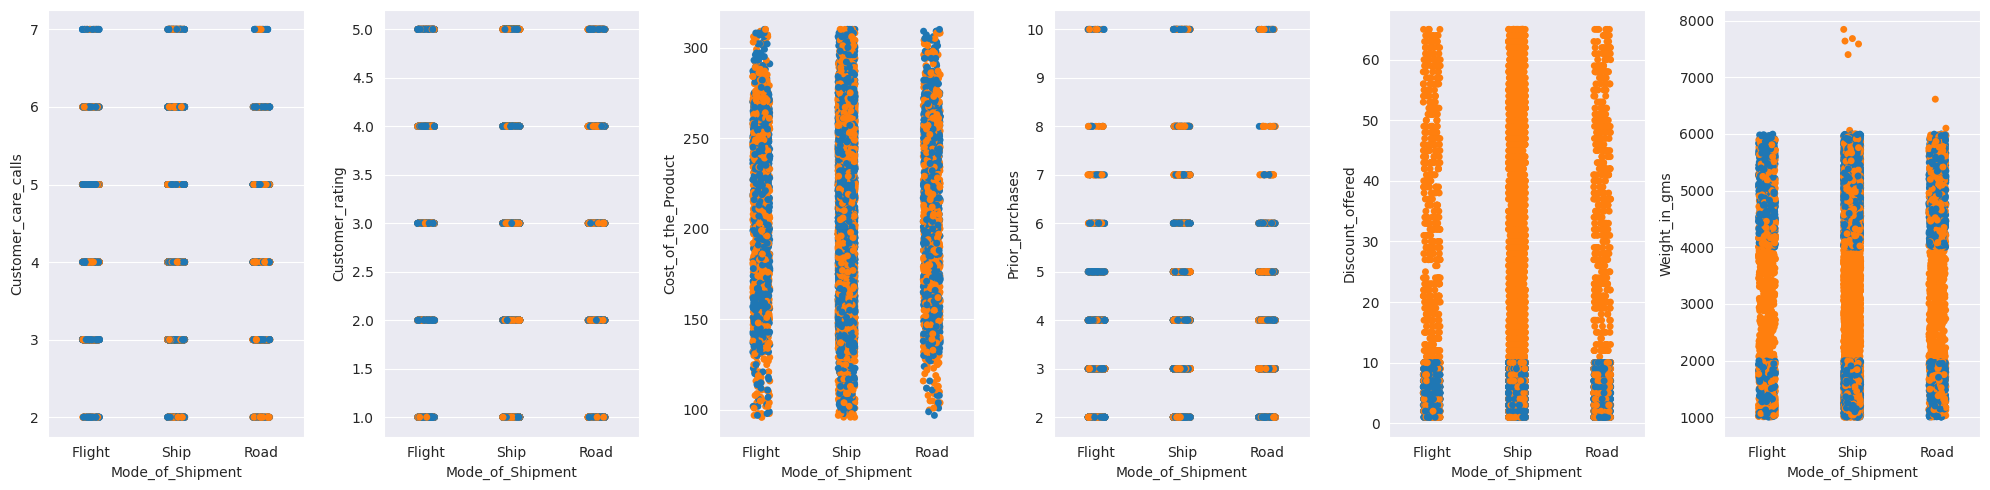

In [ ]:
# create strip plot for each categorical feature ['Mode_of_Shipment']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[1], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

#### All Features (Numerical Data) to Product_importance Variable

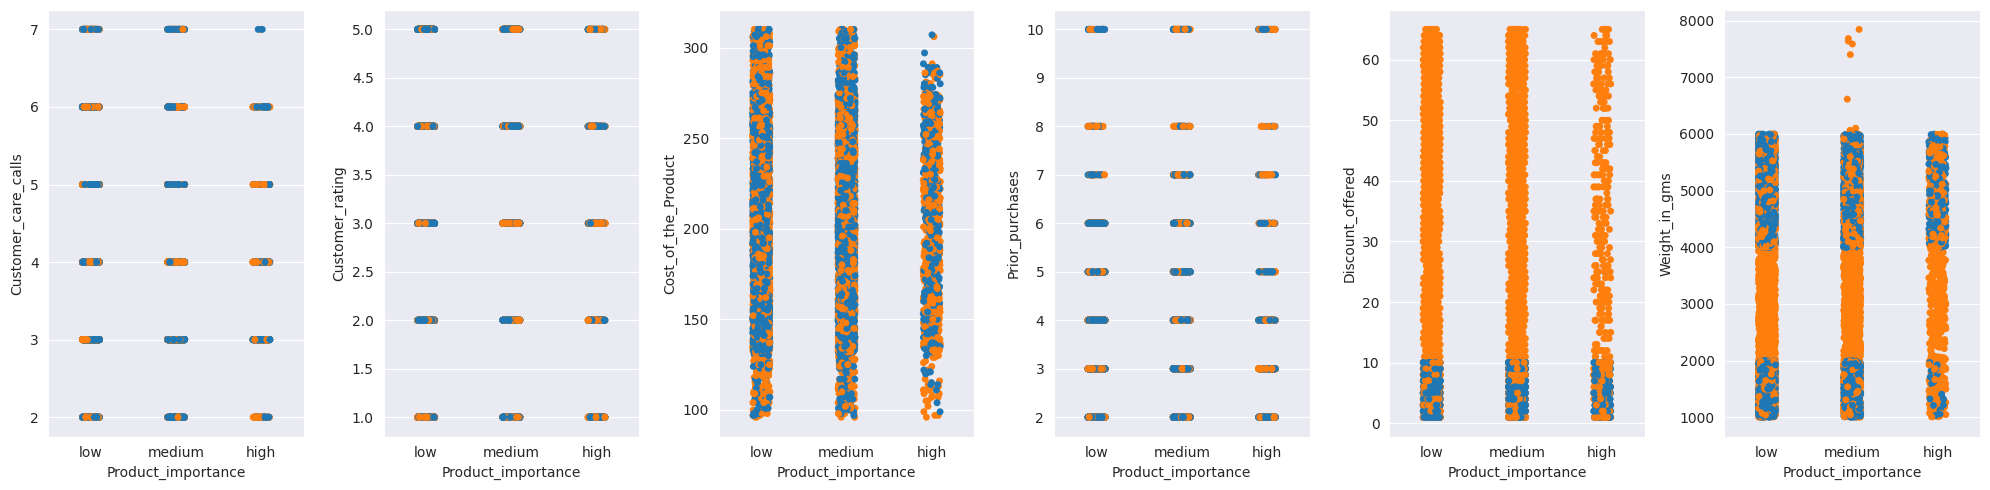

In [ ]:
# create strip plot for each categorical feature ['Product_importance']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[2], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

#### All Features (Numerical Data) to Gender Variable

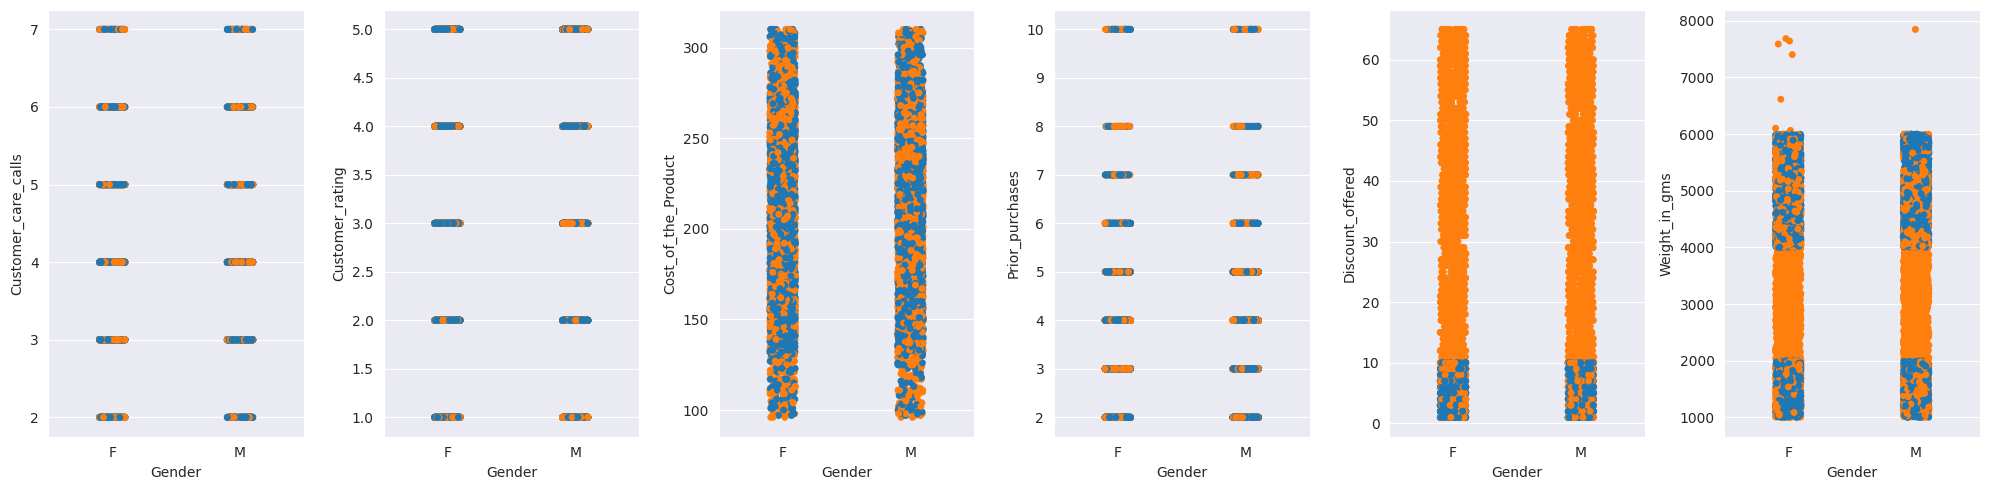

In [ ]:
# create strip plot for each categorical feature ['Gender']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[3], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

#### All Features (Numerical Data) to Reached.on.Time__Y.N Variable (as Target Variable)

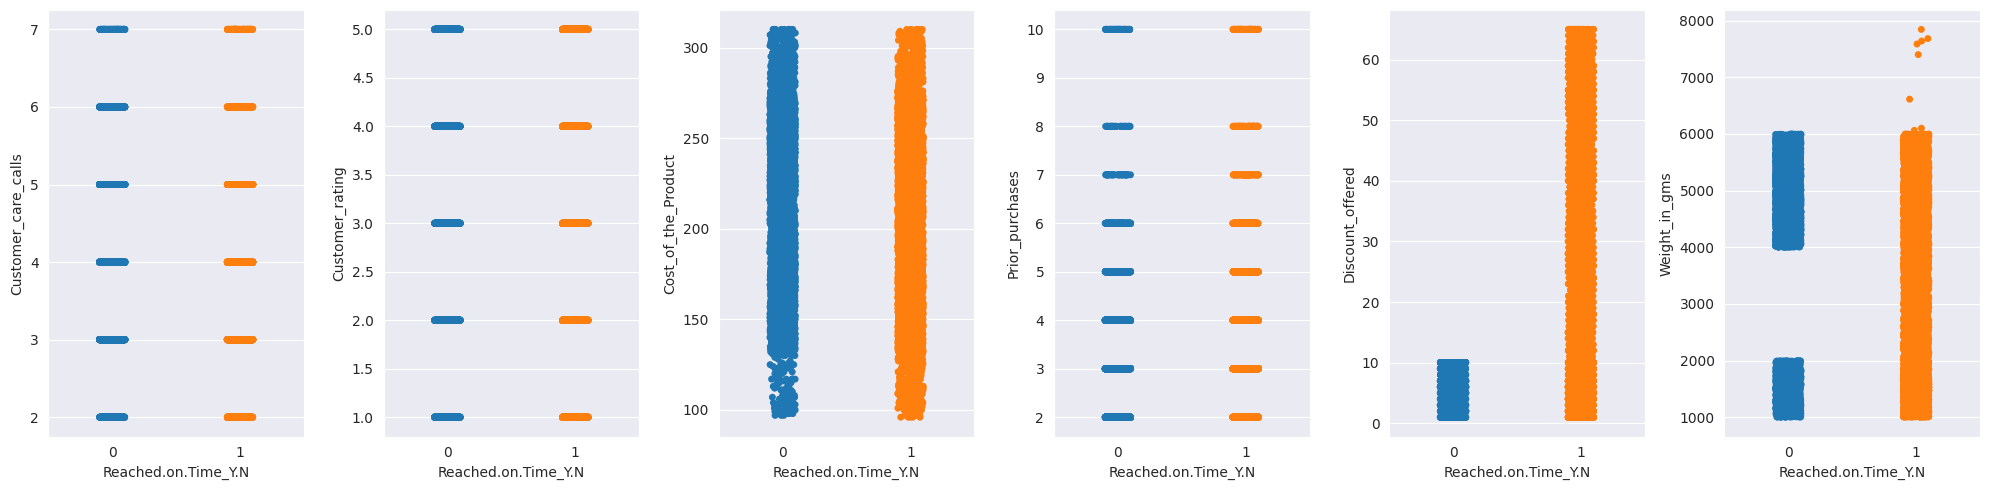

In [ ]:
# create strip plot for each categorical feature ['Reached.on.Time_Y.N']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x='Reached.on.Time_Y.N', y=numerical_columns[i], hue ='Reached.on.Time_Y.N',  legend=False)
    plt.tight_layout()

**Conclusion:**

- Berdasarkan Strip Plot di atas dapat dilihat bahwa hubungan variabel discount_offered dengan setiap fitur kategorik terlihat pattern yang sangat jelas terpisah antara yang tepat waktu dan tidak tepat waktu. Pada discount >10% seluruhnya tidak tepat waktu. Sehingga Discount offered dapat menjadi concern dalam perbaikan variabel Reached on Time. 

- Berdasarkan Strip Plot di atas dapat dilihat bahwa hubungan variabel Weight in Grams dengan setiap fitur kategorik terlihat pattern yang sangat jelas terpisah antara yang tepat waktu dan tidak tepat waktu. Pada Weight rentang 2000 - 4000 gram di hampir seluruh pesanan datang tidak tepat waktu. Sehingga Weight in Grams dapat menjadi concern dalam perbaikan variabel Reached on Time.

### **CHI-SQUARE TEST**

**Hypothesis**

H0 : There is no relationship between Predictor Variable and Target Variable

H1 : There is a relationship between Predictor Variable and Target Variable

In [ ]:
def chi2(df, col1, col2):    
    #---create the contingency table---
    df_crosstab= pd.crosstab(index = df[col1], columns = df[col2])
    
    #---calculate degree of freedom---
    degree_f = (df_crosstab.shape[0]-1) * (df_crosstab.shape[1]-1)
    
    #---sum up the totals for row and columns---
    df_crosstab.loc[:,'Total']= df_crosstab.sum(axis=1)
    df_crosstab.loc['Total']= df_crosstab.sum()
    
    #---create the expected value dataframe---
    df_exp = df_crosstab.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_crosstab.sum(1).values,df_crosstab.sum().values) / df_crosstab.sum().sum()            
    
    # calculate chi-square values
    df_chi2 = ((df_crosstab - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    #---calculate the p-value---
    from scipy import stats
    from scipy.stats import chi2
    alpha=0.05
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    
    print ('chi_square:',chi_square_score)
    print ('critical_value:',critical_value)
    print ('Df:', degree_f)
    print ('p-value:',p)
    print ('alpha:',alpha)
    print ('')
    print ('**Kesimpulan**')
    if p<=alpha:
        print('Reject H0, There is a relationship between variable', col1, 'and Reached On Time (Target Variable)')
    else:
        print('Retain H0, There is no relationship between variable', col1, 'and Reached On Time (Target Variable)') 
    return

#### **Chi-Sqaure Test All Features (Categorical Data) to Target Variable (Reached.on.Time_Y.N)**

In [ ]:
chi2(df, 'Warehouse_block', 'Reached.on.Time_Y.N')

chi_square: 1.0893868307263044
critical_value: 9.487729036781154
Df: 4
p-value: 0.8959524278243698
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block and Reached On Time (Target Variable)


In [ ]:
chi2(df, 'Mode_of_Shipment', 'Reached.on.Time_Y.N')

chi_square: 0.7434357246718557
critical_value: 5.991464547107979
Df: 2
p-value: 0.6895487627593786
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment and Reached On Time (Target Variable)


In [ ]:
chi2(df, 'Product_importance', 'Reached.on.Time_Y.N')

chi_square: 12.211163824831026
critical_value: 5.991464547107979
Df: 2
p-value: 0.0022303831047450844
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Product_importance and Reached On Time (Target Variable)


In [ ]:
chi2(df, 'Gender', 'Reached.on.Time_Y.N')

chi_square: 0.2418189825019984
critical_value: 3.841458820694124
Df: 1
p-value: 0.6228954255886712
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Gender and Reached On Time (Target Variable)


**Conclusion:**
Berdasarkan Uji Chi-Square di atas dapat disimpulkan bahwa hanya variabel Product Importance saja yang berpengaruh terhadap Variabel Target (reached On Time). Sedangkan variabel lainnya tidak ada yang berpengaruh signifikan sehingga dapat menjadi acuan untuk feature selection dengan drop variabel yang tidak berpengaruh secara signifikan.

#### **Chi-Square Test between features (categorical data)**

In [ ]:
chi2(df, 'Mode_of_Shipment', 'Warehouse_block')

chi_square: 0.02476122480867181
critical_value: 15.50731305586545
Df: 8
p-value: 0.9999999990307034
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment and Reached On Time (Target Variable)


In [ ]:
chi2(df, 'Mode_of_Shipment', 'Product_importance')

chi_square: 2.2185595488610415
critical_value: 9.487729036781154
Df: 4
p-value: 0.6956328832900156
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment and Reached On Time (Target Variable)


In [ ]:
chi2(df, 'Mode_of_Shipment', 'Gender')

chi_square: 3.6477268010700534
critical_value: 5.991464547107979
Df: 2
p-value: 0.16140098819248283
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment and Reached On Time (Target Variable)


In [ ]:
chi2(df, 'Warehouse_block', 'Product_importance')

chi_square: 8.058003966006895
critical_value: 15.50731305586545
Df: 8
p-value: 0.4278247341007601
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block and Reached On Time (Target Variable)


In [ ]:
chi2(df, 'Warehouse_block', 'Gender')

chi_square: 0.8240610292981513
critical_value: 9.487729036781154
Df: 4
p-value: 0.9351935508400286
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block and Reached On Time (Target Variable)


In [ ]:
chi2(df, 'Product_importance', 'Gender')

chi_square: 1.1043454910443284
critical_value: 5.991464547107979
Df: 2
p-value: 0.575697606116692
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Product_importance and Reached On Time (Target Variable)


**Conclusion:**
Berdasarkan Uji Chi-Square di atas dapat disimpulkan bahwa tidak ada hubungan antar feature (data kategorik) sehingga tidak ada pola yang menarik dan juga menggambarkan tidak ada data yang redundan yang artinya tidak terdapat masalah multikolinearitas pada data.

## **1.4. Business Insight**

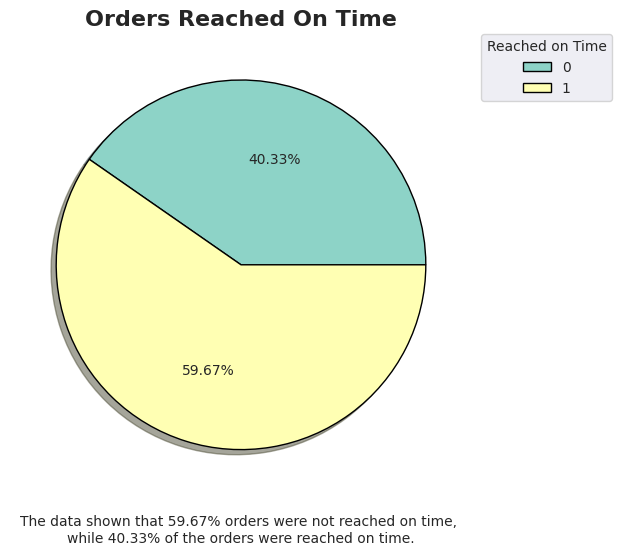

In [ ]:
df2 = pd.read_csv(url)
m = df2.groupby('Reached.on.Time_Y.N').agg({'ID' : 'nunique'}).reset_index()
m.columns = ['Reached on Time', 'Total Unique Customer']
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(m['Total Unique Customer'], colors = sns.color_palette('Set3'), 
        wedgeprops = {'edgecolor':'k'}, autopct = '%.2f%%', shadow = True, startangle = 0)
ax.set_title('Orders Reached On Time', ha = 'center', fontsize = 16, fontweight='bold')

ax.text(x = 0, y = -1.5, s = 'The data shown that 59.67% orders were not reached on time, \nwhile 40.33% of the orders were reached on time.', 
         ha = 'center', fontsize = 10)
ax.legend(labels = m['Reached on Time'], title = 'Reached on Time', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

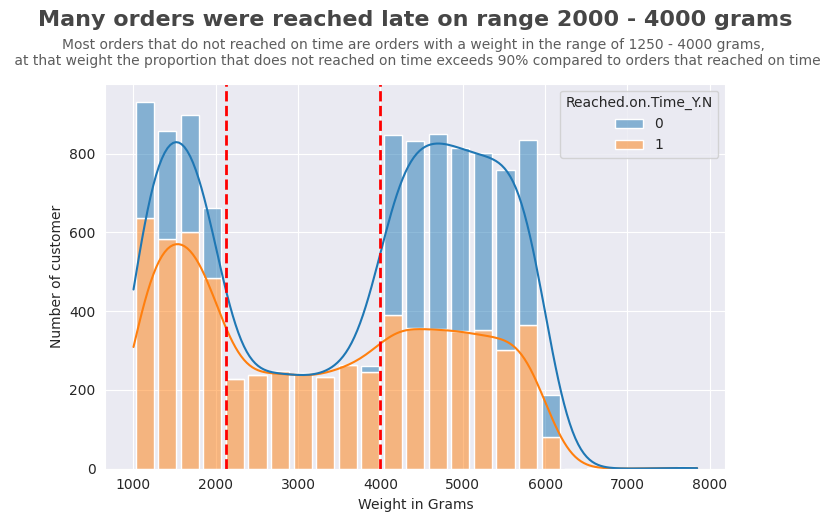

In [ ]:
# Create histplot
fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.histplot(x = 'Weight_in_gms', data = df, hue = 'Reached.on.Time_Y.N', 
             kde = True, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax)

ax.set_ylabel('Number of customer')
ax.set_xlabel('Weight in Grams')
ax.axvline(2125, color = 'r', linestyle = '--', lw = 2)
ax.text(2125*1.1, 500, s='', weight = 'bold', alpha = 0.85)

ax.axvline(4000, color = 'r', linestyle = '--', lw = 2)
ax.text(4000*1.1, 500, s = '', weight = 'bold', alpha = 0.85)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, 'Many orders were reached late on range 2000 - 4000 grams', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.12, "Most orders that do not reached on time are orders with a weight in the range of 1250 - 4000 grams, \n at that weight the proportion that does not reached on time exceeds 90% compared to orders that reached on time", 
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

plt.show()

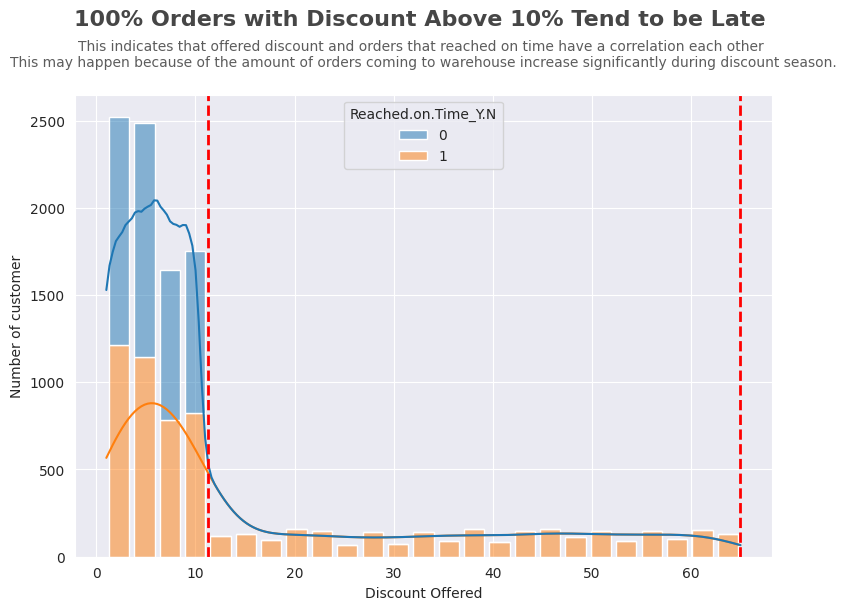

In [ ]:
# Create histplot
fig, ax = plt.subplots(1, 1, figsize = (9,6))

sns.histplot(x = 'Discount_offered', data = df, hue = 'Reached.on.Time_Y.N', 
             kde = True, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax)

ax.set_ylabel('Number of customer')
ax.set_xlabel('Discount Offered')
ax.axvline(11.25, color = 'r', linestyle = '--', lw = 2)
ax.text(11.25*1.1, 500, s='', weight = 'bold', alpha = 0.85)

ax.axvline(65, color = 'r', linestyle = '--', lw = 2)
ax.text(65*1.1, 500, s = '', weight = 'bold', alpha = 0.85)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, '100% Orders with Discount Above 10% Tend to be Late ', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.12, "This indicates that offered discount and orders that reached on time have a correlation each other \nThis may happen because of the amount of orders coming to warehouse increase significantly during discount season.", 
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

plt.show()

## **1.5. Business Recommendation**
Secara garis besar, rekomendasi yang dapat diberikan dari bussiness insight di atas yaitu melakukan kerjasama dengan Fullfillment center.

* Hal ini dapat mengatasi permasalahan di antaranya terutama untuk order dengan berat 2000-4000 gram yang sering mengalami keterlambatan
* Selain itu kerjasama dengan Fullfillment center juga dapat membantu pengelolaan pengiriman pada periode 'big discount' yangmana dapat mengatasi keterlambatan yang terjadi untuk pembelian produk dengan discount lebih dari 10%
* Meningkatkan pemantauan pengiriman barang terlebih pada periode 'big discount' dan barang dengan berat kurang dari 4000 gram.

# **2. Data Preprocessing**

## **2.1. Handle Missing Values**

In [31]:
df.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Tidak perlu dilakukan handle missing values karena semua feature tidak memiliki data yang kosong.

## **2.2. Handle Duplicated Data**

In [32]:
df.duplicated().sum()

0

Tidak perlu handle duplicated data karena semua feature tidak memiliki data duplikat

## **2.3. Feature Extraction**

Fitur yang akan ditambahkan yaitu pembagian kelas pada berat barang, seberapa sering konsumen membeli barang, dan kelas pada harga barang, kelas discount, dan seberapa sering konsumen menelpon call center

#### weight_class

In [33]:
def weight_class(x):
    if x['Weight_in_gms'] < 2000:
        res = 'light'
    elif x['Weight_in_gms'] < 4000:
        res = 'medium'
    else:
        res = 'heavy'
    return res

In [34]:
df2 = df.copy()
df2['weight_class'] = df2.apply(lambda x: weight_class(x), axis=1)

#### frequent_buy

In [35]:
def frequent_buy(x):
    if x['Prior_purchases'] <= 3:
        res = 'low'
    elif x['Prior_purchases'] <= 6:
        res = 'mid'
    else:
        res = 'high'
    return res

In [36]:
df2['frequent_buy'] = df2.apply(lambda x: frequent_buy(x), axis=1)

#### price_class

In [37]:
def price_class(x):
    if x['Cost_of_the_Product'] <= 175:
        res = 'cheap'
    elif x['Cost_of_the_Product'] <= 225:
        res = 'medium'
    else:
        res = 'expensive'
    return res

In [38]:
df2['Price_class'] = df2.apply(lambda x: price_class(x), axis=1)

#### discount_class

In [39]:
def discount_class(x):
    if x['Discount_offered'] <= 19:
        res = 'low'
    else:
        res = 'high'
    return res

In [40]:
df2['Discount_class'] = df2.apply(lambda x: discount_class(x), axis=1)

#### frequent_call

In [41]:
def frequent_call(x):
    if x['Customer_care_calls'] <= 3:
        res = 'seldom'
    elif x['Customer_care_calls'] <=5:
        res = 'rare'
    else:
      res = 'frequent'
    return res

In [42]:
df2['Frequent_call'] = df2.apply(lambda x: frequent_call(x), axis=1)

## **2.4. Feature Encoding**

In [43]:
df2.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'weight_class', 'frequent_buy', 'Price_class',
       'Discount_class', 'Frequent_call'],
      dtype='object')

In [44]:
# #---create mapping for categorical features---

def importance_map(x):
     if x == 'low' : return 1
     elif x == 'medium': return 2
     elif x == 'high' : return 3

def weight_map(x):
     if x == 'light' : return 1
     elif x == 'medium': return 2
     elif x == 'heavy' : return 3

def frequent_buy_map(x):
     if x == 'low' : return 1
     elif x == 'mid': return 2
     elif x == 'high' : return 3

def price_map(x):
     if x == 'cheap' : return 1
     elif x == 'medium': return 2
     elif x == 'expensive' : return 3

def discount_map(x):
     if x == 'low' : return 1
     elif x == 'mid': return 2
     elif x == 'high' : return 3

def call_map(x):
     if x == 'seldom' : return 1
     elif x == 'rare' : return 2
     elif x == 'frequent': return 3
    
def gender_map(x):
     if x == 'F' : return 1
     else: return 0

#---apply mapping to dataframe---
df2['Product_importance'] = df2['Product_importance'].map(importance_map)
df2['weight_class'] = df2['weight_class'].map(weight_map)
df2['frequent_buy'] = df2['frequent_buy'].map(frequent_buy_map)
df2['Price_class'] = df2['Price_class'].map(price_map)
df2['Discount_class'] = df2['Discount_class'].map(discount_map)
df2['Frequent_call'] = df2['Frequent_call'].map(call_map)
df2['Gender'] = df2['Gender'].map(gender_map)

In [45]:
cat_features = ['Warehouse_block', 'Mode_of_Shipment']

df3 = df2.copy()

#---checking unique values for categorical features---
for cat in cat_features:
    print(cat, ':', set(df3[cat]))

Warehouse_block : {'D', 'A', 'B', 'C', 'F'}
Mode_of_Shipment : {'Flight', 'Ship', 'Road'}


In [46]:
#---checking column dtypes: object for OneHotEncoding using pd.get_dummies---
df3.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance      int64
Gender                  int64
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
weight_class            int64
frequent_buy            int64
Price_class             int64
Discount_class          int64
Frequent_call           int64
dtype: object

In [47]:
#---One Hot Encoding---
df4 = pd.get_dummies(df3)
df4.head(2)

Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    4                2                  177                3   
1                    4                5                  216                2   

   Product_importance  Gender  Discount_offered  Weight_in_gms  \
0                   1       1                44           1233   
1                   1       0                59           3088   

   Reached.on.Time_Y.N  weight_class  ...  Discount_class  Frequent_call  \
0                    1             1  ...               3              2   
1                    1             2  ...               3              2   

   Warehouse_block_A  Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  0   

   Warehouse_block_F  Mode_of_Shipment_Flight  Mode_of_Shipment_Road  \
0                  0                        1                      0   
1                  1                        1                      0   

   Mode_of_Shipment_Ship  
0                      0  
1                      0  

[2 rows x 22 columns]

In [48]:
#---melihat info setelah encoding---
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Customer_care_calls      10999 non-null  int64
 1   Customer_rating          10999 non-null  int64
 2   Cost_of_the_Product      10999 non-null  int64
 3   Prior_purchases          10999 non-null  int64
 4   Product_importance       10999 non-null  int64
 5   Gender                   10999 non-null  int64
 6   Discount_offered         10999 non-null  int64
 7   Weight_in_gms            10999 non-null  int64
 8   Reached.on.Time_Y.N      10999 non-null  int64
 9   weight_class             10999 non-null  int64
 10  frequent_buy             10999 non-null  int64
 11  Price_class              10999 non-null  int64
 12  Discount_class           10999 non-null  int64
 13  Frequent_call            10999 non-null  int64
 14  Warehouse_block_A        10999 non-null  uint8
 15  Wa

## **2.5. Feature Selection**

#### Correlation

In [49]:
#---drop feature ID---
#df4 = df4.drop('ID', axis=1)

<Axes: >

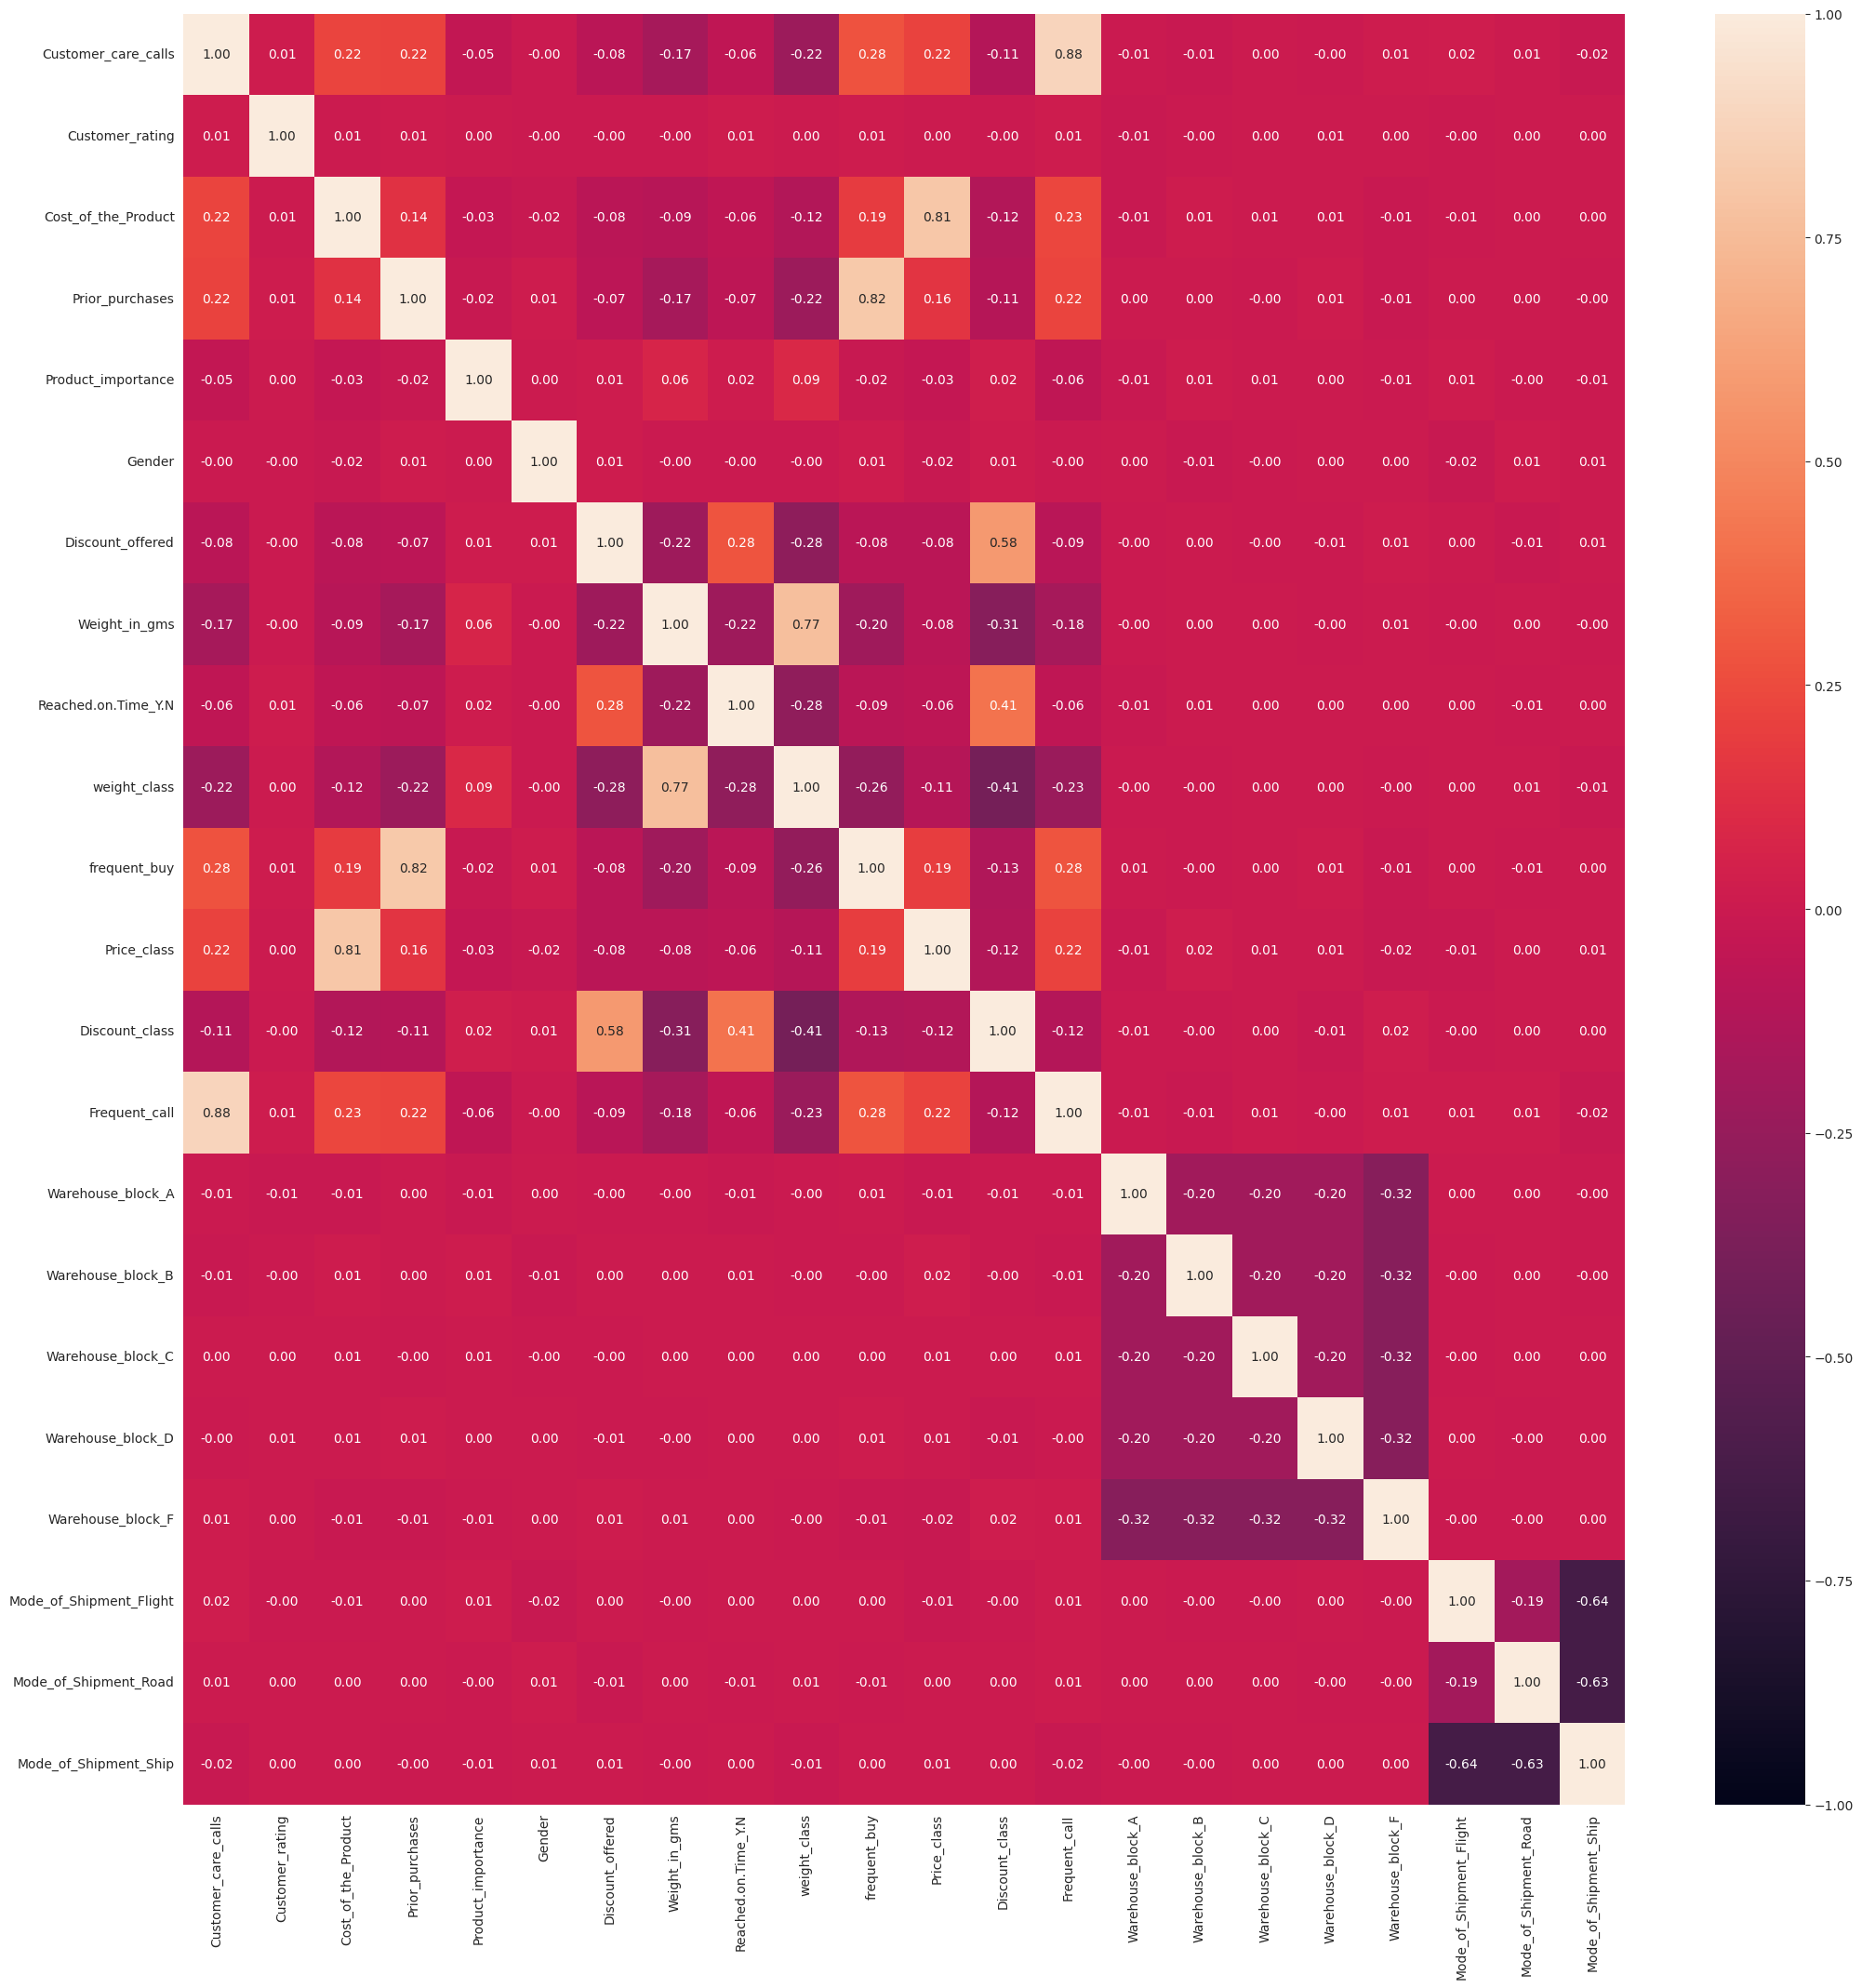

In [50]:
#---melakukan cek korelasi fitur setelah encoding---
plt.figure(figsize=(25,25))
sns.heatmap(df4.corr(method = 'kendall'),  
            annot=True, 
            vmin=-1, vmax=1,
            fmt='.2f') 

#### Chi-Square Test

In [51]:
from scipy import stats
from scipy.stats import f_oneway, chi2_contingency, kruskal
dftestchi2 = df4

X = dftestchi2.drop(columns=['Reached.on.Time_Y.N'])
y = dftestchi2['Reached.on.Time_Y.N']

chi2_scores = []
p_values = []
for col in X.columns:
    contingency_table = pd.crosstab(X[col], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p)
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2-score': chi2_scores, 'P-value': p_values})
print('Chi-Square results:')
print(chi2_results)

Chi-Square results:
                    Feature   Chi2-score       P-value
0       Customer_care_calls    54.273734  1.841150e-10
1           Customer_rating     3.200045  5.249236e-01
2       Cost_of_the_Product   268.654314  6.624116e-03
3           Prior_purchases   125.922071  4.464597e-24
4        Product_importance    12.211164  2.230383e-03
5                    Gender     0.223080  6.367032e-01
6          Discount_offered  2361.925922  0.000000e+00
7             Weight_in_gms  4828.546307  3.655331e-17
8              weight_class  1964.829133  0.000000e+00
9              frequent_buy   111.754026  5.406566e-25
10              Price_class    49.003664  2.285544e-11
11           Discount_class  1866.214531  0.000000e+00
12            Frequent_call    51.604356  6.226677e-12
13        Warehouse_block_A     0.904444  3.415929e-01
14        Warehouse_block_B     0.259458  6.104928e-01
15        Warehouse_block_C     0.000000  1.000000e+00
16        Warehouse_block_D     0.003719  9.5

In [52]:
chi2_p_values = chi2_results['P-value']

if all(chi2_p_values < 0.05):
    print('All features are significant')
else:
    print('Some of the features are not significant.')
    if any(chi2_p_values >= 0.05):
        print(chi2_results.loc[chi2_p_values >=0.05, 'Feature'])

Some of the features are not significant.
1             Customer_rating
5                      Gender
13          Warehouse_block_A
14          Warehouse_block_B
15          Warehouse_block_C
16          Warehouse_block_D
17          Warehouse_block_F
18    Mode_of_Shipment_Flight
19      Mode_of_Shipment_Road
20      Mode_of_Shipment_Ship
Name: Feature, dtype: object


##### **Kesimpulan Chi-Square Test:**
Berdasarkan CHi-Square Test di atas disimpulkan bahwa yang berpengaruh terhadap variabel target (Reached on Time) adalah 
1. Product_importance
2. weight_class
3. frequent_buy
4. Price_class
5. Discount_class
6. Frequent_call

Sedangkan feature yang tidak berpengaruh terhadap variabel target adalah:
1. Customer_rating
2. Gender
3. Warehouse_block_A
4. Warehouse_block_B
5. Warehouse_block_C
6. Warehouse_block_D
7. Warehouse_block_F
8. Mode_of_Shipment_Flight
9. Mode_of_Shipment_Road
10. Mode_of_Shipment_Ship







#### Kesimpulan Feature Selection





In [53]:
#---drop feature dengan tipe data numerik---
drop_columns = ['Customer_rating', 'Gender', 'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
               'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Weight_in_gms',
               'Prior_purchases', 'Cost_of_the_Product', 'Discount_offered', 'Customer_care_calls']
df5 = df4.drop(drop_columns, axis=1)

In [54]:
df5.columns

Index(['Product_importance', 'Reached.on.Time_Y.N', 'weight_class',
       'frequent_buy', 'Price_class', 'Discount_class', 'Frequent_call'],
      dtype='object')

In [55]:
# pemisahan features vs target
X = df5.drop(columns='Reached.on.Time_Y.N')
y = df5['Reached.on.Time_Y.N'].values

print(X.shape)
print(y.shape)

(10999, 6)
(10999,)


## **2.6. Handling Outliers**

- Data keseluruhan pada fitur yang memiliki outlier dianggap penting sehingga outlier tidak perlu dihapuskan 
- Fitur dengan data outlier sebelumnya sudah dilakukan feature extraction dengan mengubah data menjadi data kategorik sehingga tidak terdapat outlier

## **2.7. Data Training and Testing Split**

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8249, 6)
(8249,)
(2750, 6)
(2750,)


## **2.8. Feature Transformation**

- Setelah dilakukan feature extraction dan encoding, feature transformation tidak dilakukan karena semua data sudah memiliki skala yang tida begitu jauh

## **2.9. Handling Class Imbalance on Data Training**

In [57]:
# Reached.on.Time_Y.N Feature unique values sum after data split train/test
print(f'Value counts Reached.on.Time_Y.N column:')
print(pd.Series(y_train).value_counts())

total = pd.Series(y_train).value_counts().sum()

print(f'''Reached on time: Yes percentage: {round(pd.Series(y_train).value_counts()[0]/total * 100, 2)}%''')
print(f'''Reached on time: No percentage: {round(pd.Series(y_train).value_counts()[1]/total * 100, 2)}%''')

Value counts Reached.on.Time_Y.N column:
1    4913
0    3336
dtype: int64
Reached on time: Yes percentage: 40.44%
Reached on time: No percentage: 59.56%


- Distribusi nilai unik pada fitur target `Reached.on.Time_Y.N` yaitu sebanyak 59.56% data '1' dan 40.44% data '0' sehingga masih termasuk Balanced 
- Best practice untuk handling imbalance data adalah ketika data target memiliki proporsi 70:30 atau 80:20. Pada dataset ini data target masih berada pada threshold 60:40, sehingga direncanakan akan dilakukan experiment antara melakukan handling dan tidak handling imbalance data, sehingga hasil yang lebih baik yang akan digunakan.
- Untuk mengatasi class imbalance pada dataset ini direncanakan menggunakan algoritma oversampling SMOTE sehingga data sintetis dapat dibuat di antara kelas minoritas menggunakan interpolasi antar titik-titik data.

In [58]:
X_train.columns

Index(['Product_importance', 'weight_class', 'frequent_buy', 'Price_class',
       'Discount_class', 'Frequent_call'],
      dtype='object')

- sebelum dilakukan under/oversampling, perlu dilakukan pemisahan data target dan fitur kemudian data training dan data testing
- undersampling/oversampling hanya akan dilakukan pada data training (bukan data testing), karena ditakutkan terjadi data leaking/kebocoran data jika dilakukan handling class imbalance pada data testing 

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8249 entries, 1463 to 7270
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Product_importance  8249 non-null   int64
 1   weight_class        8249 non-null   int64
 2   frequent_buy        8249 non-null   int64
 3   Price_class         8249 non-null   int64
 4   Discount_class      8249 non-null   int64
 5   Frequent_call       8249 non-null   int64
dtypes: int64(6)
memory usage: 451.1 KB


In [60]:
#---handling imbalance class with SMOTE---
from imblearn import under_sampling, over_sampling

X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [61]:
print('Original (y Train)')
print(pd.Series(y_train).value_counts())
print('\n')
print('y SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())
print('\n')
print('Original (X Train)')
print(X_train.shape)
print('\n')
print('X SMOTE')
print(X_over_SMOTE.shape)

Original (y Train)
1    4913
0    3336
dtype: int64


y SMOTE
1    4913
0    4913
dtype: int64


Original (X Train)
(8249, 6)


X SMOTE
(9826, 6)


# **3. Modelling and Evaluation**

## **3.1. Functions**

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.utils import compute_sample_weight

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("")
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    
def eval_cv_ab_roc_auc(model):
    score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def eval_cv_ab_precision(model):
    score = cross_validate(model, X_train, y_train, cv=5, scoring='precision', return_train_score=True)
    print('precision (crossval train): '+ str(score['train_score'].mean()))
    print('precision (crossval test): '+ str(score['test_score'].mean()))

def eval_cv_ab_recall(model):
    score = cross_validate(model, X_train, y_train, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def weighted_sample(y):
    class_weights = compute_sample_weight(class_weight={0: 1, 1: 2}, y=y)  # Calculate sample weights based on class imbalance
    return class_weights

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification2(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("")
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

def eval_cv_ab_roc_auc2(model):
    score = cross_validate(model, X_over_SMOTE, y_over_SMOTE, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def eval_cv_ab_precision2(model):
    score = cross_validate(model, X_over_SMOTE, y_over_SMOTE, cv=5, scoring='precision', return_train_score=True)
    print('precision (crossval train): '+ str(score['train_score'].mean()))
    print('precision (crossval test): '+ str(score['test_score'].mean()))

def eval_cv_ab_recall2(model):
    score = cross_validate(model, X_over_SMOTE, y_over_SMOTE, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

import warnings
warnings.filterwarnings('ignore')


## **3.2. Modelling**

### **Decision Tree**			

#### Without SMOTE

##### Not Tuned

In [ ]:
from sklearn.tree import DecisionTreeClassifier# import decision tree dari sklearn

dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train)
eval_classification(dt)
eval_cv_ab_roc_auc(dt)
eval_cv_ab_precision(dt)
eval_cv_ab_recall(dt)

# Show feature importance
# show_feature_importance(dt.best_estimator_)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.91
Recall (Test Set): 0.52
F1-Score (Test Set): 0.66

roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7715503922481466
roc_auc (crossval test): 0.7397423706759378
precision (crossval train): 0.9344672153048924
precision (crossval test): 0.9137977986744314
recall (crossval train): 0.5242212258145116
recall (crossval test): 0.5147540779814899


#####  Tuned

Accuracy (Test Set): 0.60
Precision (Test Set): 0.65
Recall (Test Set): 0.72
F1-Score (Test Set): 0.69

roc_auc (train-proba): 0.69
roc_auc (test-proba): 0.67
roc_auc (crossval train): 0.6902128411101437
roc_auc (crossval test): 0.6887663770359153
precision (crossval train): 0.6683965755130226
precision (crossval test): 0.6677596006771715
recall (crossval train): 0.7304088918060462
recall (crossval test): 0.73010278605955
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


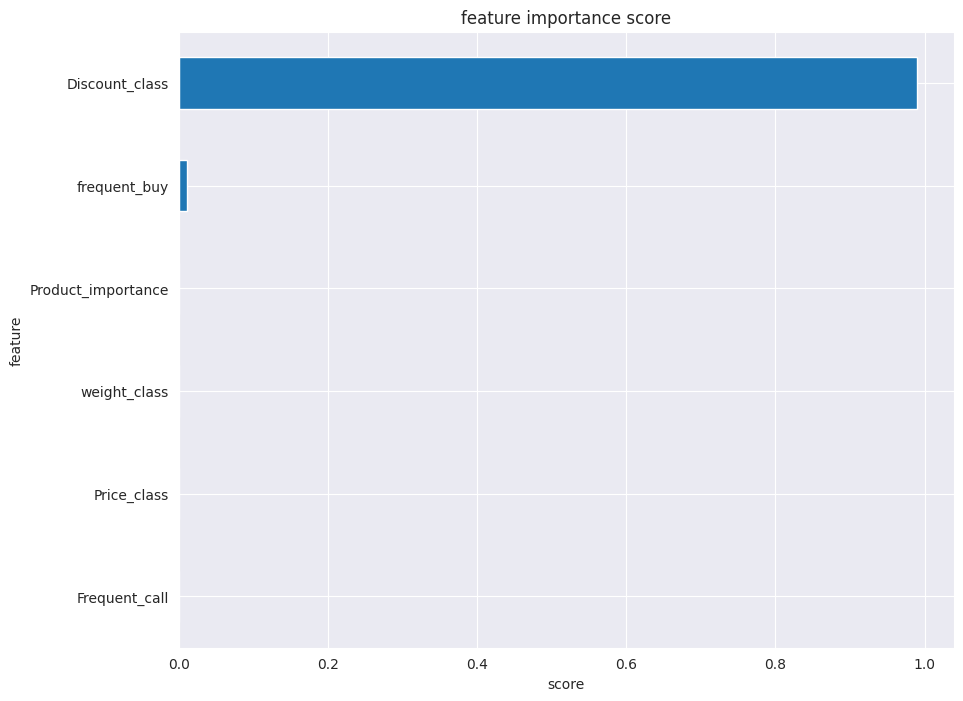

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node 2, 5, 10, 100
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node 1, 2, 4, 10, 20, 50
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Init
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
dt_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(dt_tuned)
eval_cv_ab_roc_auc(dt_tuned)
eval_cv_ab_precision(dt_tuned)
eval_cv_ab_recall(dt_tuned)

# Show Best Hyperparameter
show_best_hyperparameter(dt_tuned)

# Show feature importance
show_feature_importance(dt_tuned.best_estimator_)

#### With SMOTE

##### Not Tuned

In [ ]:
from sklearn.tree import DecisionTreeClassifier# import decision tree dari sklearn

dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification2(dt)
eval_cv_ab_roc_auc2(dt)
eval_cv_ab_precision2(dt)
eval_cv_ab_recall2(dt)

# Show feature importance
# show_feature_importance(dt.best_estimator_)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.95
Recall (Test Set): 0.50
F1-Score (Test Set): 0.65

roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7703167504310903
roc_auc (crossval test): 0.7417577128948357
precision (crossval train): 0.9608789651351304
precision (crossval test): 0.9495404329238382
recall (crossval train): 0.4966413767256161
recall (crossval test): 0.49033073450284154


##### Tuned

Accuracy (Test Set): 0.67
Precision (Test Set): 0.96
Recall (Test Set): 0.47
F1-Score (Test Set): 0.64

roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.757327071744338
roc_auc (crossval test): 0.7361806398261656
precision (crossval train): 0.9522264799227257
precision (crossval test): 0.9444492190943233
recall (crossval train): 0.480815272095039
recall (crossval test): 0.480563468993252
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


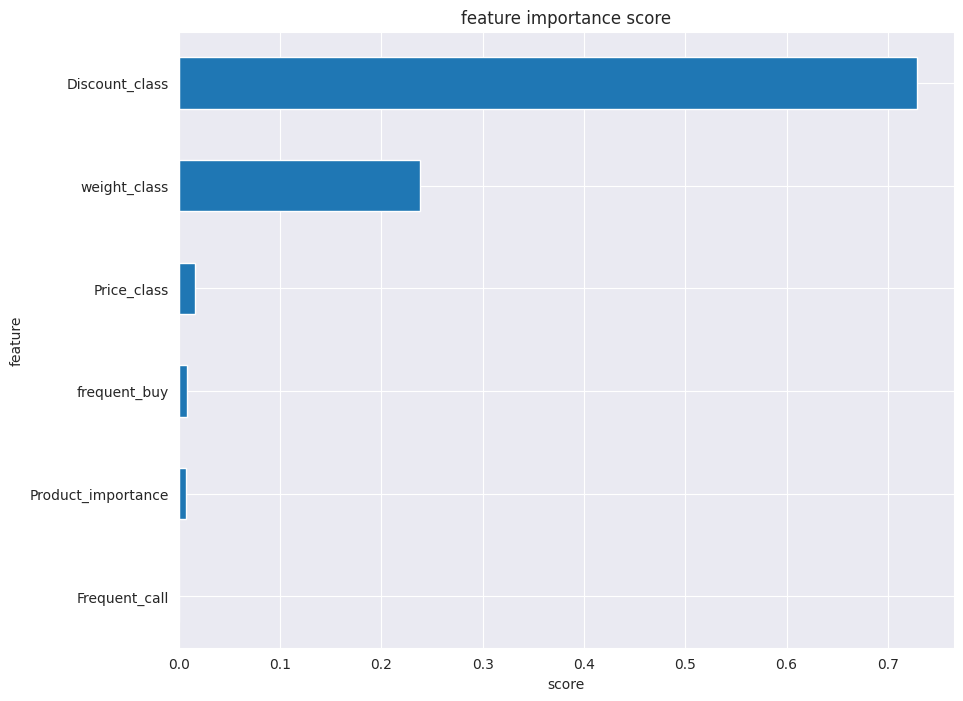

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node 2, 5, 10, 100
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node 1, 2, 4, 10, 20, 50
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Init
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
dt_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification2(dt_tuned)
eval_cv_ab_roc_auc2(dt_tuned)
eval_cv_ab_precision2(dt_tuned)
eval_cv_ab_recall2(dt_tuned)

# Show Best Hyperparameter
show_best_hyperparameter(dt_tuned)

# Show feature importance
show_feature_importance(dt_tuned.best_estimator_)

### **Adaboost**			

#### Without SMOTE

##### Not Tuned

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)

eval_classification(clf)
eval_cv_ab_roc_auc(clf)
eval_cv_ab_recall(clf)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.83
Recall (Test Set): 0.58
F1-Score (Test Set): 0.68

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7433498547627335
roc_auc (crossval test): 0.7385440340149038
recall (crossval train): 0.618408669135462
recall (crossval test): 0.6130733674088839


##### Tuned

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned)
eval_cv_ab_roc_auc(ab_tuned)
eval_cv_ab_recall(ab_tuned)
show_best_hyperparameter(ab_tuned)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.81
Recall (Test Set): 0.61
F1-Score (Test Set): 0.70

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.7279811452993712
roc_auc (crossval test): 0.7260030144616467
recall (crossval train): 0.6917955469766965
recall (crossval test): 0.6820365770025256
{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.2113157894736842, 'n_estimators': 105, 'random_state': 42}


#### With SMOTE

##### Not Tuned

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=42)
clf.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification2(clf)
eval_cv_ab_roc_auc2(clf)
eval_cv_ab_recall2(clf)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.98
Recall (Test Set): 0.48
F1-Score (Test Set): 0.65

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7440864736433617
roc_auc (crossval test): 0.7404493018947904
recall (crossval train): 0.4784241266167082
recall (crossval test): 0.4781188555753305


#####  Tuned

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification2(ab_tuned)
eval_cv_ab_roc_auc2(ab_tuned)
eval_cv_ab_recall2(ab_tuned)
show_best_hyperparameter(ab_tuned)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.98
Recall (Test Set): 0.48
F1-Score (Test Set): 0.64

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7427909157424785
roc_auc (crossval test): 0.7410402962918378
recall (crossval train): 0.47221629081296124
recall (crossval test): 0.4718076962123927
{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.7371052631578947, 'n_estimators': 168, 'random_state': 42}


### **KNN**			

#### Without SMOTE

##### Not Tuned

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() 
knn.fit(X_train, y_train) 

eval_classification(knn)
eval_cv_ab_roc_auc(knn)
eval_cv_ab_recall(knn)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.72
Recall (Test Set): 0.70
F1-Score (Test Set): 0.71

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7413370955709674
roc_auc (crossval test): 0.7225339333898493
recall (crossval train): 0.6319986044250601
recall (crossval test): 0.6228267513099472


#####  Tuned

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# List of Hyperparameter
n_neighbors = list(range(1,110))
p=list(range(1,20))
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init Model
knn.fit(X_train, y_train)
knn_tuned = RandomizedSearchCV(knn, hyperparameters, scoring='recall', random_state=1, cv=5)
knn_tuned.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(knn_tuned)
eval_cv_ab_roc_auc(knn_tuned)
eval_cv_ab_recall(knn_tuned)

#Show Best Hyperparameter
show_best_hyperparameter(knn_tuned)

# Show feature importance
# show_feature_importance(knn_tuned.best_estimator_)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.76
Recall (Test Set): 0.66
F1-Score (Test Set): 0.70

roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.7432385806265055
roc_auc (crossval test): 0.7219554332197919
recall (crossval train): 0.6408026756718794
recall (crossval test): 0.6283201388989605
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 8, 'weights': 'uniform'}


#### With SMOTE

##### Not Tuned

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knns = KNeighborsClassifier() # inisiasi object dengan nama knn
knns.fit(X_over_SMOTE, y_over_SMOTE) # fit model KNN dari data train

eval_classification2(knns)
eval_cv_ab_roc_auc2(knns)
eval_cv_ab_recall2(knns)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.74
Recall (Test Set): 0.65
F1-Score (Test Set): 0.69

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.7106643555468801
roc_auc (crossval test): 0.6948716535469368
recall (crossval train): 0.7259324751453671
recall (crossval test): 0.7109650204183959


##### Tuned

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# List of Hyperparameter
n_neighbors = list(range(1,110))
p=list(range(1,20))
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init Model
knns.fit(X_over_SMOTE, y_over_SMOTE)
knns_tuned = RandomizedSearchCV(knns, hyperparameters, scoring='recall', random_state=1, cv=5)
knns_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification2(knns_tuned)
eval_cv_ab_roc_auc2(knns_tuned)
eval_cv_ab_recall2(knns_tuned)

#Show Best Hyperparameter
show_best_hyperparameter(knns_tuned)

# Show feature importance
# show_feature_importance(knns_tuned.best_estimator_)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.74
Recall (Test Set): 0.65
F1-Score (Test Set): 0.69

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.7144086973514051
roc_auc (crossval test): 0.6957303449877855
recall (crossval train): 0.7064982655644473
recall (crossval test): 0.6912054830281796
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 8, 'weights': 'uniform'}


### **XGBoost**			

#### Without SMOTE

##### Not Tuned

In [67]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)
eval_cv_ab_roc_auc(xg)
eval_cv_ab_recall(xg)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.92
Recall (Test Set): 0.52
F1-Score (Test Set): 0.66

roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7709814148673704
roc_auc (crossval test): 0.7403039664013659
recall (crossval train): 0.5249844421875315
recall (crossval test): 0.5165862431187624


In [68]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|===================| 2738/2750 [00:25<00:00]       

              Feature  Importance
4      Discount_class    1.873823
1        weight_class    1.307749
2        frequent_buy    0.366240
3         Price_class    0.210882
5       Frequent_call    0.155461
0  Product_importance    0.094548


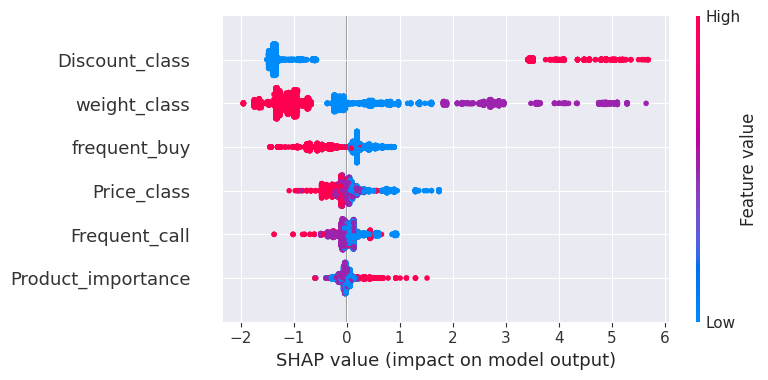

In [69]:
import shap
# Initialize the SHAP explainer with the best model
explainer = shap.Explainer(xg, X_train)

# Calculate SHAP values for all features
shap_values = explainer(X_test)

# Calculate feature importance
feature_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': feature_importance}
).sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)

# Plot the feature importance using a bar chart
shap.summary_plot(shap_values, X_test)

#####  Tuned

Accuracy (Test Set): 0.60
Precision (Test Set): 0.60
Recall (Test Set): 0.98
F1-Score (Test Set): 0.75

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.7386443833678473
roc_auc (crossval test): 0.7364928506839814
recall (crossval train): 0.9833600343844809
recall (crossval test): 0.9826995792007922
{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.30000000000000004, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.1, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 80, 'max_leaves': None, 'min_child_weight': 11, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 1

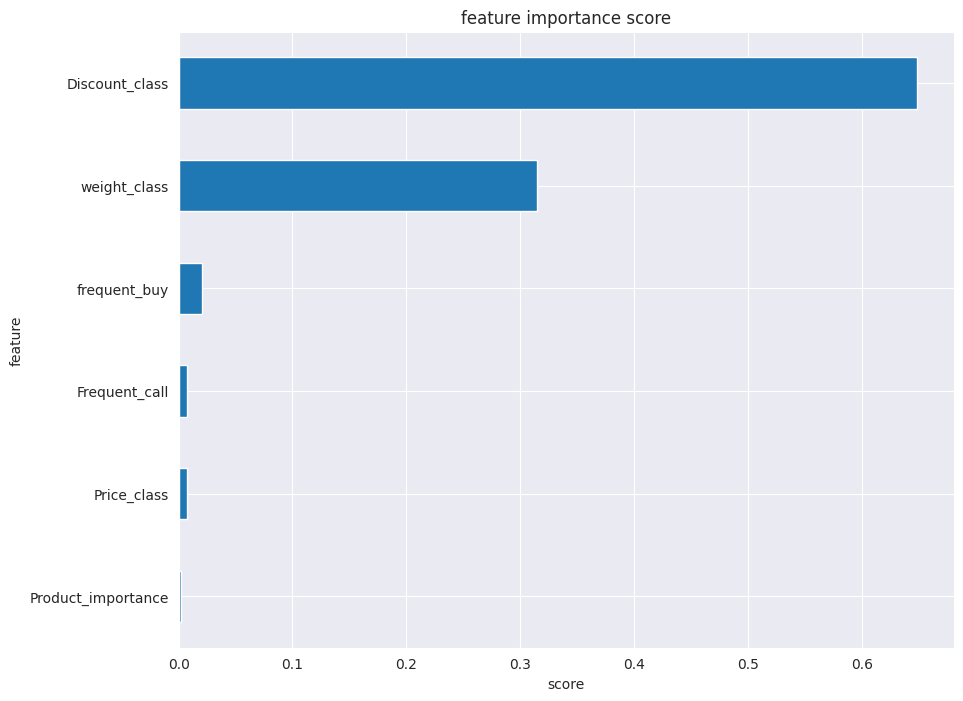

In [70]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 15)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0.01, 0.2, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)
eval_cv_ab_roc_auc(xg_tuned)
eval_cv_ab_recall(xg_tuned)

#Show Best Hyperparameter
show_best_hyperparameter(xg_tuned)

# Show feature importance
show_feature_importance(xg_tuned.best_estimator_)

              Feature  Importance
4      Discount_class    0.168441
1        weight_class    0.128348
2        frequent_buy    0.042319
3         Price_class    0.037639
5       Frequent_call    0.020844
0  Product_importance    0.005725


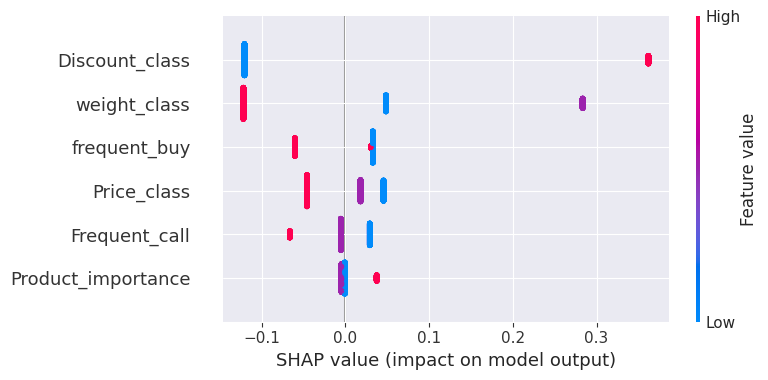

In [71]:
import shap
xg_tuned.fit(X_train,y_train)

# Get the best model with tuned hyperparameters
best_model = xg_tuned.best_estimator_

# Initialize the SHAP explainer with the best model
explainer = shap.Explainer(best_model, X_train)

# Calculate SHAP values for all features
shap_values = explainer(X_test)

# Calculate feature importance
feature_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': feature_importance}
).sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)

# Plot the feature importance using a bar chart
shap.summary_plot(shap_values, X_test)

Confusion matrix, without normalization
[[  44 1056]
 [  36 1614]]
Normalized confusion matrix
[[0.04       0.96      ]
 [0.02181818 0.97818182]]


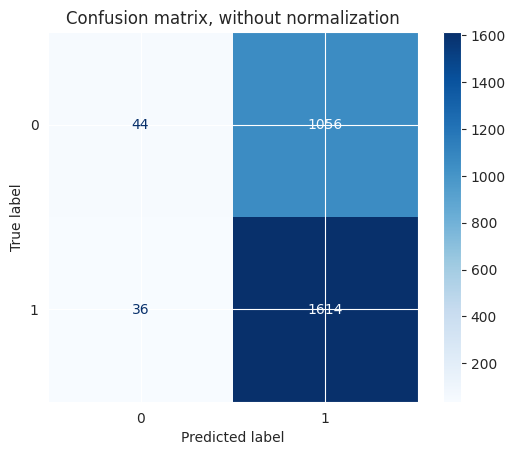

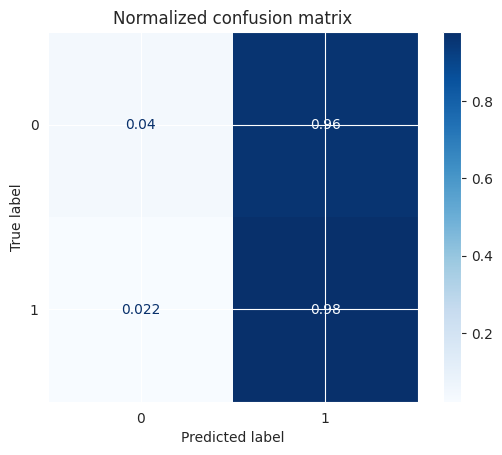

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        xg_tuned,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[ 222 4214]
 [ 147 6416]]
Normalized confusion matrix
[[0.05004509 0.94995491]
 [0.02239829 0.97760171]]


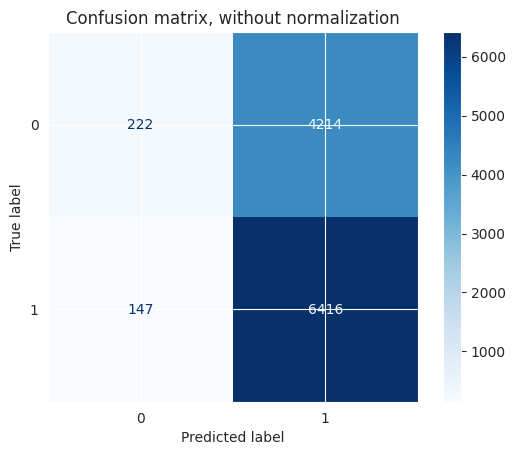

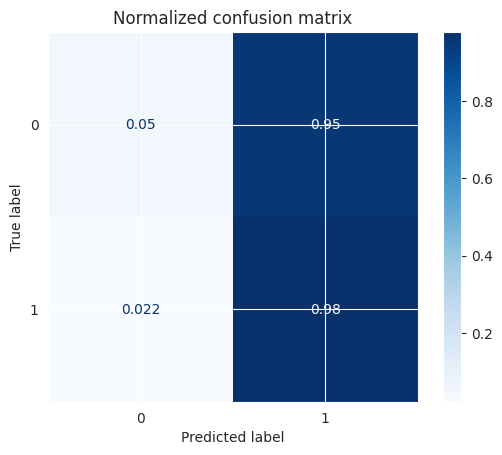

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        xg_tuned,
        X,
        y,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### With SMOTE

##### Not Tuned

In [74]:
xg = XGBClassifier()
xg.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification2(xg)
eval_cv_ab_roc_auc2(xg)
eval_cv_ab_recall2(xg)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.95
Recall (Test Set): 0.49
F1-Score (Test Set): 0.65

roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.7718757613567246
roc_auc (crossval test): 0.7449500325429832
recall (crossval train): 0.4981677317958706
recall (crossval test): 0.4905339861142477


##### Tuned

Accuracy (Test Set): 0.68
Precision (Test Set): 0.98
Recall (Test Set): 0.49
F1-Score (Test Set): 0.65

roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.7513483135993274
roc_auc (crossval test): 0.739852353735473
recall (crossval train): 0.4837673532558776
recall (crossval test): 0.4827984079659714
{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6000000000000001, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.1, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 80, 'max_leaves': None, 'min_child_weight': 11, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100

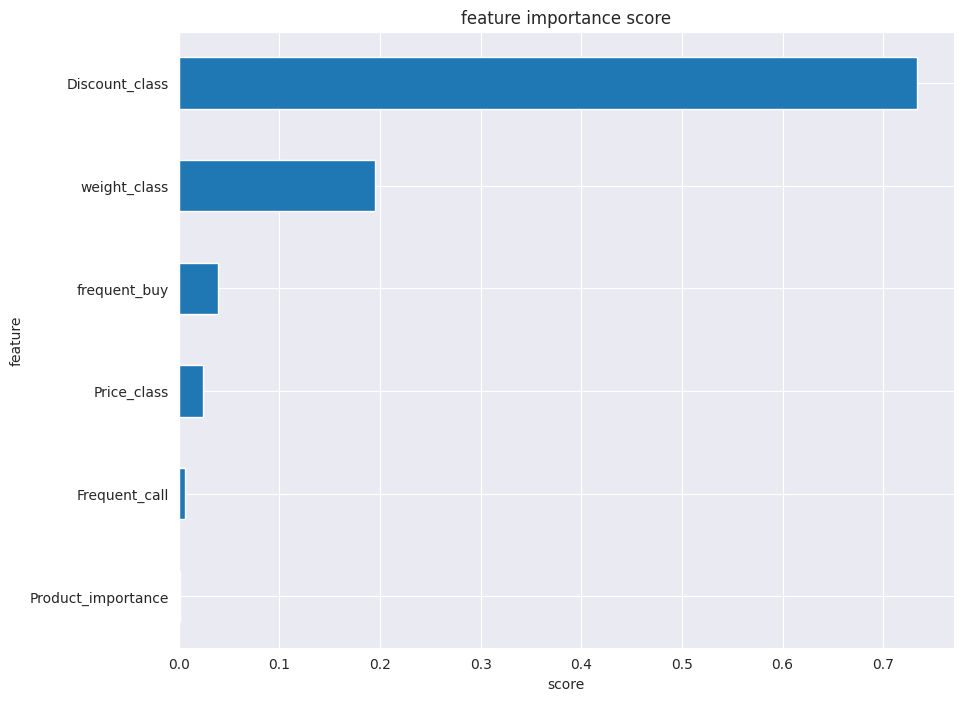

In [75]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 15)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0.01, 0.02, num = 50)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuneds = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuneds.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification2(xg_tuneds)
eval_cv_ab_roc_auc2(xg_tuneds)
eval_cv_ab_recall2(xg_tuneds)

#Show Best Hyperparameter
show_best_hyperparameter(xg_tuneds)

# Show feature importance
show_feature_importance(xg_tuneds.best_estimator_)

### **Random Forest**			

#### Without SMOTE

##### Not Tuned

In [77]:
from sklearn.ensemble import RandomForestClassifier# import decision tree dari sklearn

rfc = RandomForestClassifier(random_state=42) # inisiasi object dengan nama rfc
rfc.fit(X_train, y_train)
eval_classification(rfc)
eval_cv_ab_roc_auc(rfc)
eval_cv_ab_precision(rfc)
eval_cv_ab_recall(rfc)

# Show feature importance
# show_feature_importance(rfc.best_estimator_)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.89
Recall (Test Set): 0.53
F1-Score (Test Set): 0.66

roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7714009701849063
roc_auc (crossval test): 0.7399680656393014
precision (crossval train): 0.9264690440421435
precision (crossval test): 0.9037714312103471
recall (crossval train): 0.5294117418600631
recall (crossval test): 0.5208594994747779


#####  Tuned

Accuracy (Test Set): 0.68
Precision (Test Set): 0.81
Recall (Test Set): 0.61
F1-Score (Test Set): 0.70

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.7714009701849063
roc_auc (crossval test): 0.7399680656393014
precision (crossval train): 0.9264690440421435
precision (crossval test): 0.9037714312103471
recall (crossval train): 0.5294117418600631
recall (crossval test): 0.5208594994747779
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


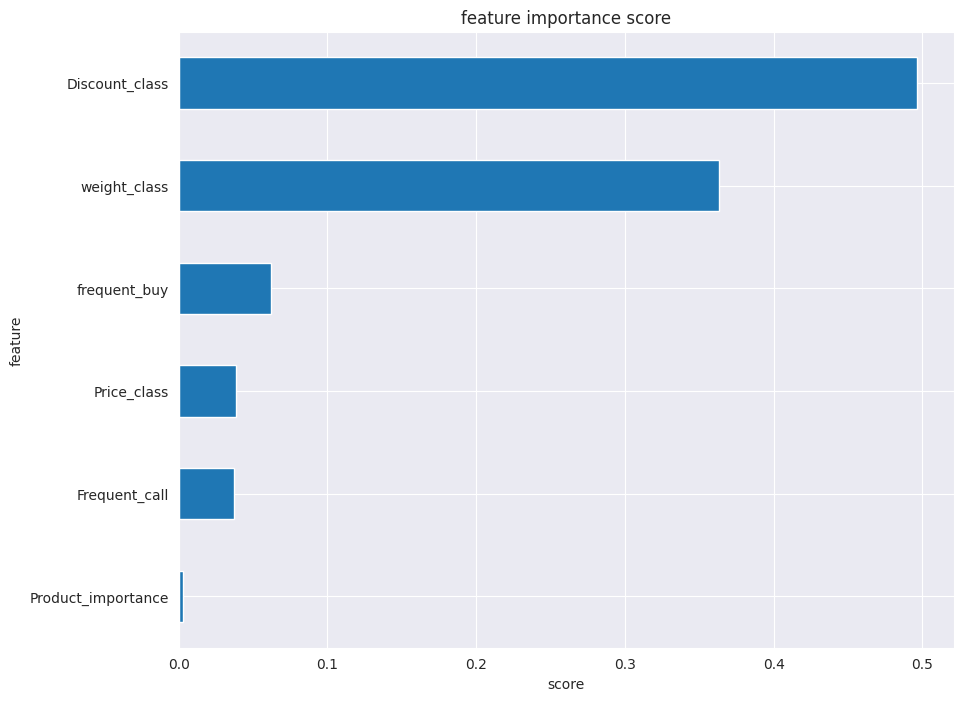

In [78]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node 2, 5, 10, 100
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node 1, 2, 4, 10, 20, 50
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion
                      )

# Init
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc_tuned = RandomizedSearchCV(rfc, hyperparameters, cv=5, random_state=42, scoring='recall')
rfc_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rfc_tuned)
eval_cv_ab_roc_auc(rfc)
eval_cv_ab_precision(rfc)
eval_cv_ab_recall(rfc)

# Show Best Hyperparameter
show_best_hyperparameter(rfc_tuned)

# Show feature importance
show_feature_importance(rfc_tuned.best_estimator_)

#### With SMOTE

##### Not Tuned

Accuracy (Test Set): 0.68
Precision (Test Set): 0.96
Recall (Test Set): 0.49
F1-Score (Test Set): 0.65

roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.7722124074288825
roc_auc (crossval test): 0.7465267624675476
precision (crossval train): 0.9595303659419724
precision (crossval test): 0.9463752924098111
recall (crossval train): 0.4981676541200855
recall (crossval test): 0.4923653224987724


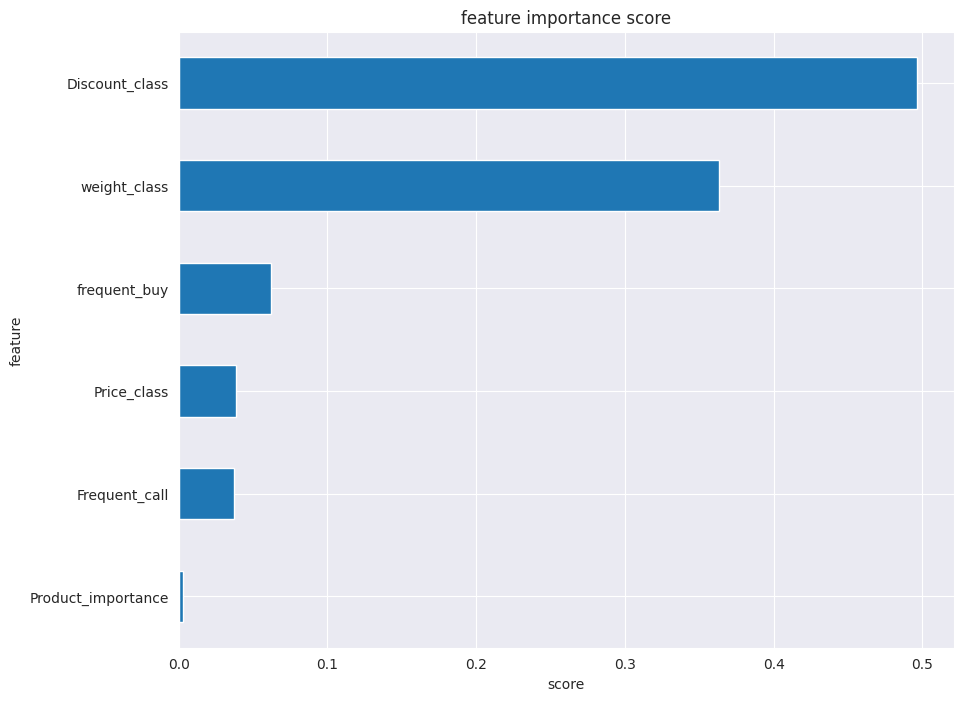

In [79]:
from sklearn.ensemble import RandomForestClassifier# import decision tree dari sklearn

rfc = RandomForestClassifier(random_state=42) # inisiasi object dengan nama dt
rfc.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification2(rfc)
eval_cv_ab_roc_auc2(rfc)
eval_cv_ab_precision2(rfc)
eval_cv_ab_recall2(rfc)

# Show feature importance
show_feature_importance(rfc_tuned.best_estimator_)

##### Tuned

Accuracy (Test Set): 0.68
Precision (Test Set): 0.96
Recall (Test Set): 0.49
F1-Score (Test Set): 0.65

roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.7715994222173357
roc_auc (crossval test): 0.7473592051885132
precision (crossval train): 0.960446710658006
precision (crossval test): 0.9468539433962959
recall (crossval train): 0.49730270836043894
recall (crossval test): 0.4927718257215846
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


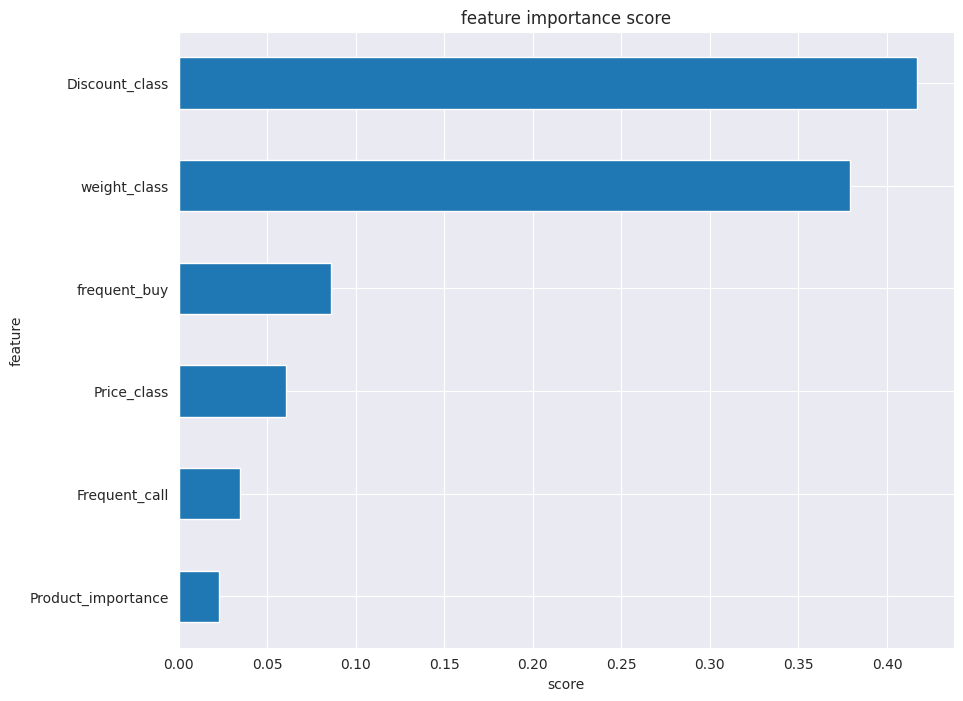

In [80]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node 2, 5, 10, 100
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node 1, 2, 4, 10, 20, 50
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion
                      )

# Init
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc_tuned = RandomizedSearchCV(rfc, hyperparameters, cv=5, random_state=42, scoring='recall')
rfc_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification2(rfc_tuned)
eval_cv_ab_roc_auc2(rfc_tuned)
eval_cv_ab_precision2(rfc_tuned)
eval_cv_ab_recall2(rfc_tuned)

# Show Best Hyperparameter
show_best_hyperparameter(rfc_tuned)

# Show feature importance
show_feature_importance(rfc_tuned.best_estimator_)

### **CATBoost**

#### Without SMOTE

##### Not Tuned

In [82]:
from catboost import CatBoostClassifier

cg = CatBoostClassifier(silent=True)
cg.fit(X_train, y_train, sample_weight=weighted_sample(y_train))

eval_classification(cg)
eval_cv_ab_roc_auc(cg)
eval_cv_ab_recall(cg)

Accuracy (Test Set): 0.60
Precision (Test Set): 0.60
Recall (Test Set): 0.98
F1-Score (Test Set): 0.75

roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7703580142106885
roc_auc (crossval test): 0.7394681718513292
recall (crossval train): 0.5223381576468898
recall (crossval test): 0.5141447375236454


#####  Tuned

Accuracy (Test Set): 0.60
Precision (Test Set): 0.60
Recall (Test Set): 1.00
F1-Score (Test Set): 0.75

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.74
Accuracy (Test Set): 0.60
Precision (Test Set): 0.60
Recall (Test Set): 1.00
F1-Score (Test Set): 0.75

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7376954887190948
roc_auc (crossval test): 0.7354267743397898
recall (crossval train): 1.0
recall (crossval test): 1.0
{'iterations': 80, 'learning_rate': 0.03, 'depth': 5, 'rsm': 0.1, 'silent': True}


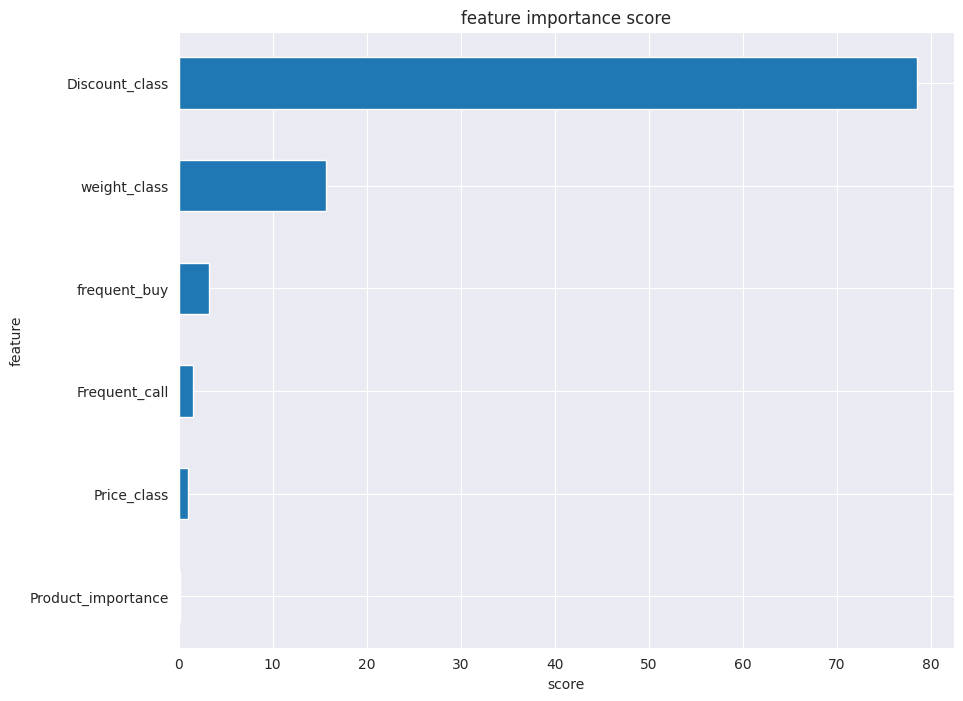

In [83]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = {'depth'         : [4,5,6,7,8,9, 10],
                   'learning_rate' : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
                   'iterations'    : [10, 20,30,40,50,60,70,80,90, 100],
                   'rsm'           : [0.1,0.2,0.3,0.4,0.5]
                  }

# Init
cg = CatBoostClassifier(silent=True)
cg_tuned = RandomizedSearchCV(cg, hyperparameters, cv=5, random_state=42, scoring='recall')
cg_tuned.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(cg_tuned)

# Predict & Evaluation
eval_classification(cg_tuned)
eval_cv_ab_roc_auc(cg_tuned)
eval_cv_ab_recall(cg_tuned)

#Show Best Hyperparameter
show_best_hyperparameter(cg_tuned)

# Show feature importance
show_feature_importance(cg_tuned.best_estimator_)

#### With SMOTE

##### Not Tuned

In [84]:
from catboost import CatBoostClassifier

cgs = CatBoostClassifier(silent=True)
cgs.fit(X_over_SMOTE, y_over_SMOTE, sample_weight=weighted_sample(y_over_SMOTE))

eval_classification2(cgs)
eval_cv_ab_roc_auc2(cgs)
eval_cv_ab_recall2(cgs)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.64
Recall (Test Set): 0.85
F1-Score (Test Set): 0.73

roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.7717272869494161
roc_auc (crossval test): 0.7452095090845792
recall (crossval train): 0.4977606718437578
recall (crossval test): 0.49175391015905834


##### Tuned

Accuracy (Test Set): 0.69
Precision (Test Set): 0.98
Recall (Test Set): 0.49
F1-Score (Test Set): 0.65

roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7491939936016532
roc_auc (crossval test): 0.7410629028836737
recall (crossval train): 0.4828513745053833
recall (crossval test): 0.48218803156719214
{'iterations': 20, 'learning_rate': 0.09, 'depth': 10, 'rsm': 0.3, 'silent': True}


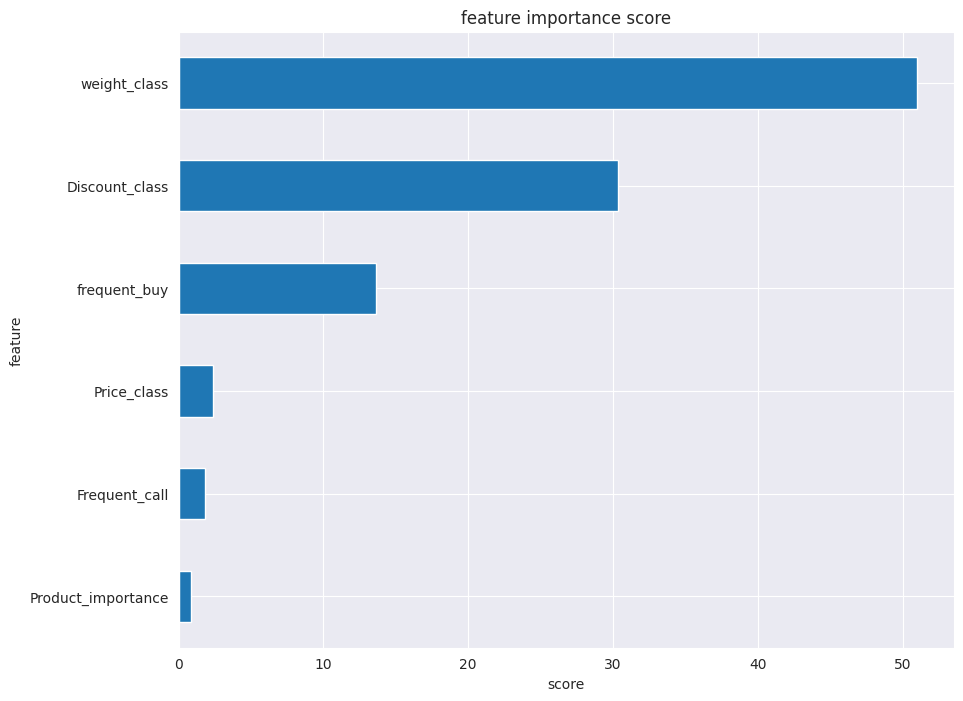

In [85]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {'depth'         : [4,5,6,7,8,9, 10],
                   'learning_rate' : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
                   'iterations'    : [10, 20,30,40,50,60,70,80,90, 100],
                   'rsm'           : [0.1,0.2,0.3,0.4,0.5]
                  }

# Init
cgs = CatBoostClassifier(silent=True)
cgs_tuned = RandomizedSearchCV(cgs, hyperparameters, cv=5, random_state=42, scoring='recall')
cgs_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification2(cgs_tuned)
eval_cv_ab_roc_auc2(cgs_tuned)
eval_cv_ab_recall2(cgs_tuned)

#Show Best Hyperparameter
show_best_hyperparameter(cgs_tuned)

# Show feature importance
show_feature_importance(cgs_tuned.best_estimator_)

### **Kesimpulan**

* Eksperimen modelling dilakukan menggunakan 6 model klasifikasi dengan tidak melakukan tuning dan melakukan tuning hyperparameter, juga dengan menggunakan data yang dioversampling dengan tidak dilakukan oversampling.
* Adapun model yang digunakan sebagai berikut:
  * Decision Tree
  * KNN
  * Adaboost
  * XGBoost
  * Random Forest
  * CATBoost
* Hyperparameter yang digunakan pada masing-masing model adalah sebagai berikut:

  * Decision Tree
    * `max_depth`: nilai maksimum untuk seberapa dalam percabangan tree yang akan diprediksi
    * `min_samples_split`: jumlah minimum sampel yang dibutuhkan untuk membagi node internal
    * `min_samples_leaf`: jumlah minimum sampel yang diperlukan untuk membagi leaf node.
    * `max_features`: metode dalam menentukan jumlah fitur yang akan dimasukkan. (Dalam hal ini menggunakan 'auto' dan 'sqrt'. Kedua metode ini akan menghitung jumlah fitur dengan rumus berikut: max_features=sqrt(n_features))
    * `criterion`: fungsi untuk menghitung seberapa bagus kualitas untuk memisahkan keputusan yang dijalankan oleh model Decision Tree. (Terdapat 2 criterion yang akan digunakan yaitu Gini impurity dan Entropy. Perbedaan dari 2 metode tersebut ada pada kompleksitas perhitungan kualitas. Entropy termasuk criterion yang lebih kompleks dibandingkan dengan Gini impurity.)
    * `splitter`: metode yang akan digunakan oleh model Decision Tree dalam memilih percabangan. (Dari model ini kami memilih 2 metode, yaitu best dan random. 'Best' jika memilih percabangan yang bagus dalam nilai criterionnya. 'Random' bila mesin dengan bebas memilih dengan acak.)

  * KNN
    * `n_neighbors`: menentukan jumlah tetangga yang akan dipertimbangkan saat membuat prediksi untuk titik data baru
    * `algorithm`: algoritma yang digunakan untuk menghitung tetangga terdekat
    * `p` (`pint`): menentukan perhitungan yang digunakan dalam menghitung jarak antara nilai sebelum dijumlahkan. `p = 1`(Manhattan), `p = 2`(Euclidean), `p` lain(Minkowski)
    
  * Adaboost
    * `n_estimator`: mengacu pada jumlah maksimum estimator yang digunakan dalam proses boosting.
    * `learning_rate`: mewakili bobot yang diberikan kepada setiap pengklasifikasi selama setiap iterasi proses boosting
    * `algoritma`: 'SAMME.R' dianggap sebagai algoritma yang lebih kompleks yang menghasilkan konvergensi lebih cepat dan kinerja lebih baik dibandingkan dengan 'SAMME'

  * XGBoost
    * `max_depth`: Digunakan untuk mengontrol over-fitting karena kedalaman yang lebih tinggi akan memungkinkan model mempelajari hubungan yang sangat spesifik untuk sampel tertentu.
    * `min_child_weight`: Menentukan minimum weight (atau jumlah sample; jika total weightnya=1) yang dimiliki oleh node untuk membuat leaf baru (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
    * `gamma`: Menentukan minimum loss reduction yang diperlukan untuk melakukan pemisahan.
    * `tree_method`: Menentukan bagaimana metode xgboost untuk membangun sebuah treenya
    * `colsample_bytree`: Menentukan berapa banyak faeture yang digunakan. 1 untuk semua feature
    * `eta`: Menyusutkan step size digunakan dalam pembaruan untuk mencegah overfitting. Setelah setiap step boosting, didapatkan bobot fitur baru, dan eta mengecilkan bobot fitur agar proses boosting lebih konservatif.
    * `lambda`: Koefisien regularisasi pada L2 norm. Dengan meningkatkan nilai lambda akan membuat model lebih konservatif.
    * `alpha`: Koefisien regularisasi pada L1 norm.Dengan meningkatkan nilai lambda akan membuat model lebih konservatif

  * Random Forest
  
    * Pada random forest tidak beda jauh dengan model Decision Tree untuk hyperparameternya. Akan tetapi, Random Forest tidak memiliki hyperparameter 'splitter'. Random forest terdiri dari beberapa subset decision tree yang memiliki training set berbeda pada masing-masing tree (yang di generate secara random).

  * CATBoost
    * `rsm` (Random Subspace Method): mengatur persentase fitur yang akan dipilih secara acak pada setiap pemisahan ketika membuat descision tree. Dengan memilih subset fitur secara acak, hal ini dapat meningkatkan kemampuan generalisasi model dan mencegah overfitting
    * `depth`: mengontrol jumlah maksimum level dalam setiap decision tree. Meningkatkan depth memungkinkan model untuk menangkap hubungan yang lebih kompleks dalam data tetapi juga dapat meningkatkan risiko overfitting.
    * 'learning_rate': mengontrol penyusutan kontribusi tiap tree dalam proses ensemble. Laju pembelajaran yang lebih kecil dapat membantu mencegah overfitting, tetapi membutuhkan lebih banyak iterasi untuk mencapai konvergensi. Sebaliknya, laju pembelajaran yang lebih besar dapat menghasilkan konvergensi yang lebih cepat tetapi dapat meningkatkan risiko overfitting
    * `iterations`: menentukan jumlah iterasi boosting atau jumlah decision tree yang akan dibangun dalam model CatBoost. Setiap iterasi menambahkan decision tree baru ke dalam ensemble, dan model belajar dari kesalahan pada iterasi sebelumnya. Meningkatkan jumlah iterasi memungkinkan model untuk mempelajari hubungan yang lebih kompleks tetapi juga dapat meningkatkan risiko overfitting.



* Merujuk pada goals yang ada, prediksi keterlambatan barang fokus untuk mengurangi False Negative, sehingga metrics evaluation yang cocok digunakan yaitu recall.
* Model dengan evaluasi terbaik yaitu XGBoost dengan eksperimen pada data yang tidak dilakukan oversampling serta dilakukan tuning hyperparameter, yaitu dengan score sebagai berikut:
  * Recall (Test Set): 0.98
  * Recall (crossval train): 0.9833600343844809
  * Recall (crossval test): 0.9826995792007922

## **3.3. Feature importance**



* Feature yang paling penting pada model terbaik yaitu `Discount_class` dan `weight_class`



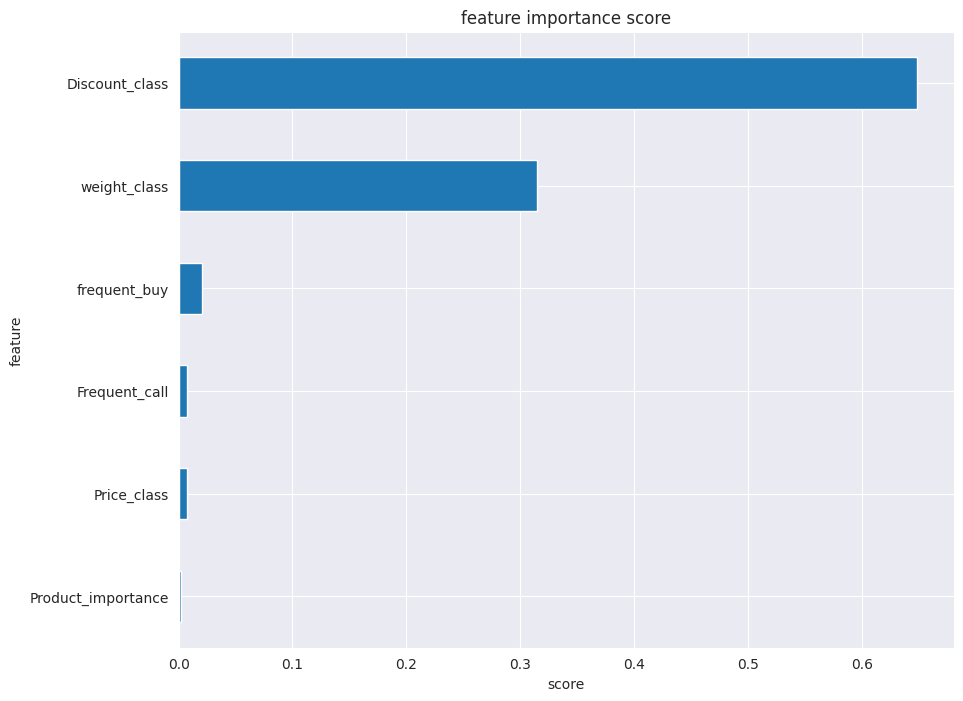

In [86]:
show_feature_importance(xg_tuned.best_estimator_)

              Feature  Importance
4      Discount_class    0.168441
1        weight_class    0.128348
2        frequent_buy    0.042319
3         Price_class    0.037639
5       Frequent_call    0.020844
0  Product_importance    0.005725


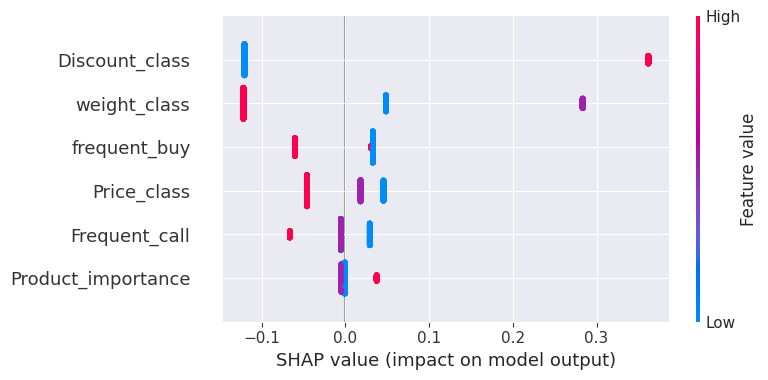

In [88]:
# Print the feature importance by shap values
print(feature_importance_df)

# Plot the feature importance using a bar chart
shap.summary_plot(shap_values, X_test)

* Business Insight
  * `Discount_class` memiliki pengaruh yang besar terhadap keterlambatan barang. hal ini sesuai dengan insight yang didapatkan dari proses EDA bahwa 100% barang dengan diskon lebih dari 10% mengalami keterlambatan
  * `weight_class` merupakan fitur yang memiliki pengaruh terbesar kedua pada keterlambatan barang. hal ini juga sesuai dengan hasil EDA bahwa mayoritas barang dengan berat 2-4 kilogram mengalami keterlambatan


* Rekomendasi
  * Melakukan kerjasama dengan Fulfillment Center dapat membantu pengelolaan pengiriman pada periode 'big discount' yang mana dapat mengatasi keterlambatan yang terjadi untuk pembelian produk dengan discount lebih dari 10% dan berat 2-4 kilograms